In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotnine as p9
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from sklearn.tree import export_graphviz

data = pd.read_csv('data.csv')
data


,Timestamp,Nama,Jenis kelamin,Usia,Jenis makanan yang paling Anda sukai?,Apakah Anda memiliki alergi makanan? (Jika iya sebutkan),Apakah Anda sering melewatkan sarapan?,Berapa kali Anda makan dalam sehari? (Contoh:4),Apakah Anda memiliki pola makan yang teratur?,Seberapa penting bagi Anda untuk memilih makanan?,Seberapa sering Anda berolahraga dalam seminggu? (Contoh:4)
0,28/09/2023 13:56:57,Rizfi Ferdiansyah,Laki - laki,20,Makanan sehat,Tidak,Tidak,3,Iya,Penting,1
1,28/09/2023 15:11:05,Praja Muhammad Purnayuda,Laki - laki,20,Makanan cepat saji,Tidak,Iya,2,Tidak,Kurang penting,0
2,28/09/2023 15:11:46,Thomas Gianto,Laki - laki,18,Makanan sehat,Tidak,Tidak,4,Iya,Penting,2
3,28/09/2023 15:12:21,Abrar Ikrama Putra,Laki - laki,20,Makanan cepat saji,Tidak,Iya,3,Tidak,Sangat penting,1
4,29/09/2023 9:54:07,Adit,Laki - laki,20,Makanan yang ada,Tidak,Iya,2,Iya,Penting,2
...,...,...,...,...,...,...,...,...,...,...,...
76,12/10/2023 8:40:14,Iqbal,Laki - laki,22,Makanan cepat saji,Tidak,Iya,2,Tidak,Penting,1
77,12/10/2023 8:40:46,Muhammad Naufal,Laki - laki,21,Makanan cepat saji,Tidak,Tidak,4,Iya,Sangat penting,2
78,12/10/2023 8:41:41,Kemal Fahrezi,Laki - laki,19,Makanan cepat saji,Tidak,Iya,3,Tidak,Kurang penting,0
79,12/10/2023 8:42:21,Novia,Perempuan,22,Makanan sehat,Tidak,Tidak,3,Iya,Penting,1


In [2]:
new_col = ['Timestamp', 'Nama', 'Jenis Kelamin', 'Usia', 'Jenis Makanan Favorit', 'Alergi Makanan', 'Melewatkan Sarapan', 'Jumlah Makan Sehari', 'Pola Makan Teratur', 'Tingkat Kepentingan Memilih Makanan', 'Total Olahraga Seminggu']
data.columns = new_col
data

,Timestamp,Nama,Jenis Kelamin,Usia,Jenis Makanan Favorit,Alergi Makanan,Melewatkan Sarapan,Jumlah Makan Sehari,Pola Makan Teratur,Tingkat Kepentingan Memilih Makanan,Total Olahraga Seminggu
0,28/09/2023 13:56:57,Rizfi Ferdiansyah,Laki - laki,20,Makanan sehat,Tidak,Tidak,3,Iya,Penting,1
1,28/09/2023 15:11:05,Praja Muhammad Purnayuda,Laki - laki,20,Makanan cepat saji,Tidak,Iya,2,Tidak,Kurang penting,0
2,28/09/2023 15:11:46,Thomas Gianto,Laki - laki,18,Makanan sehat,Tidak,Tidak,4,Iya,Penting,2
3,28/09/2023 15:12:21,Abrar Ikrama Putra,Laki - laki,20,Makanan cepat saji,Tidak,Iya,3,Tidak,Sangat penting,1
4,29/09/2023 9:54:07,Adit,Laki - laki,20,Makanan yang ada,Tidak,Iya,2,Iya,Penting,2
...,...,...,...,...,...,...,...,...,...,...,...
76,12/10/2023 8:40:14,Iqbal,Laki - laki,22,Makanan cepat saji,Tidak,Iya,2,Tidak,Penting,1
77,12/10/2023 8:40:46,Muhammad Naufal,Laki - laki,21,Makanan cepat saji,Tidak,Tidak,4,Iya,Sangat penting,2
78,12/10/2023 8:41:41,Kemal Fahrezi,Laki - laki,19,Makanan cepat saji,Tidak,Iya,3,Tidak,Kurang penting,0
79,12/10/2023 8:42:21,Novia,Perempuan,22,Makanan sehat,Tidak,Tidak,3,Iya,Penting,1


# Visualization

In [115]:
print(data.dtypes)

Timestamp                              object
Nama                                   object
Jenis Kelamin                          object
Usia                                    int64
Jenis Makanan Favorit                  object
Alergi Makanan                         object
Melewatkan Sarapan                     object
Jumlah Makan Sehari                     int64
Pola Makan Teratur                     object
Tingkat Kepentingan Memilih Makanan    object
Total Olahraga Seminggu                 int64
dtype: object


In [3]:
## Missing Value
missing_values = data.isna().sum()
missing_values

Timestamp                              0
Nama                                   0
Jenis Kelamin                          0
Usia                                   0
Jenis Makanan Favorit                  0
Alergi Makanan                         0
Melewatkan Sarapan                     0
Jumlah Makan Sehari                    0
Pola Makan Teratur                     0
Tingkat Kepentingan Memilih Makanan    0
Total Olahraga Seminggu                0
dtype: int64

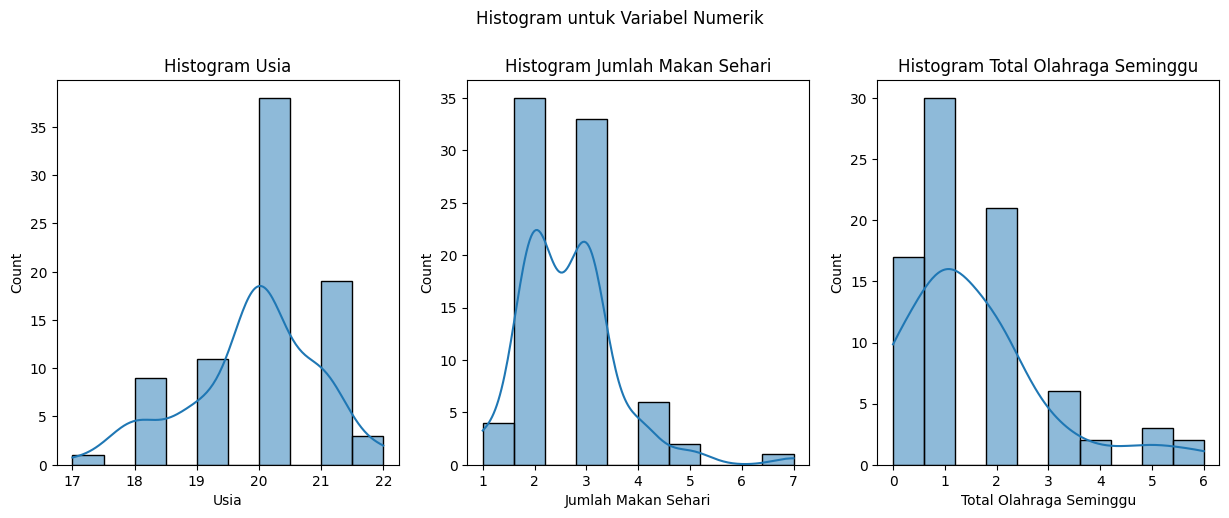

In [12]:
datanumerik = data[['Usia', 'Jumlah Makan Sehari', 'Total Olahraga Seminggu']]

fig, axes = plt.subplots(nrows=1, ncols=len(datanumerik.columns), figsize=(15, 5))
for i, column in enumerate(datanumerik.columns):
    sns.histplot(datanumerik[column], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram {column}')
plt.suptitle('Histogram untuk Variabel Numerik', y=1.02)

plt.show()

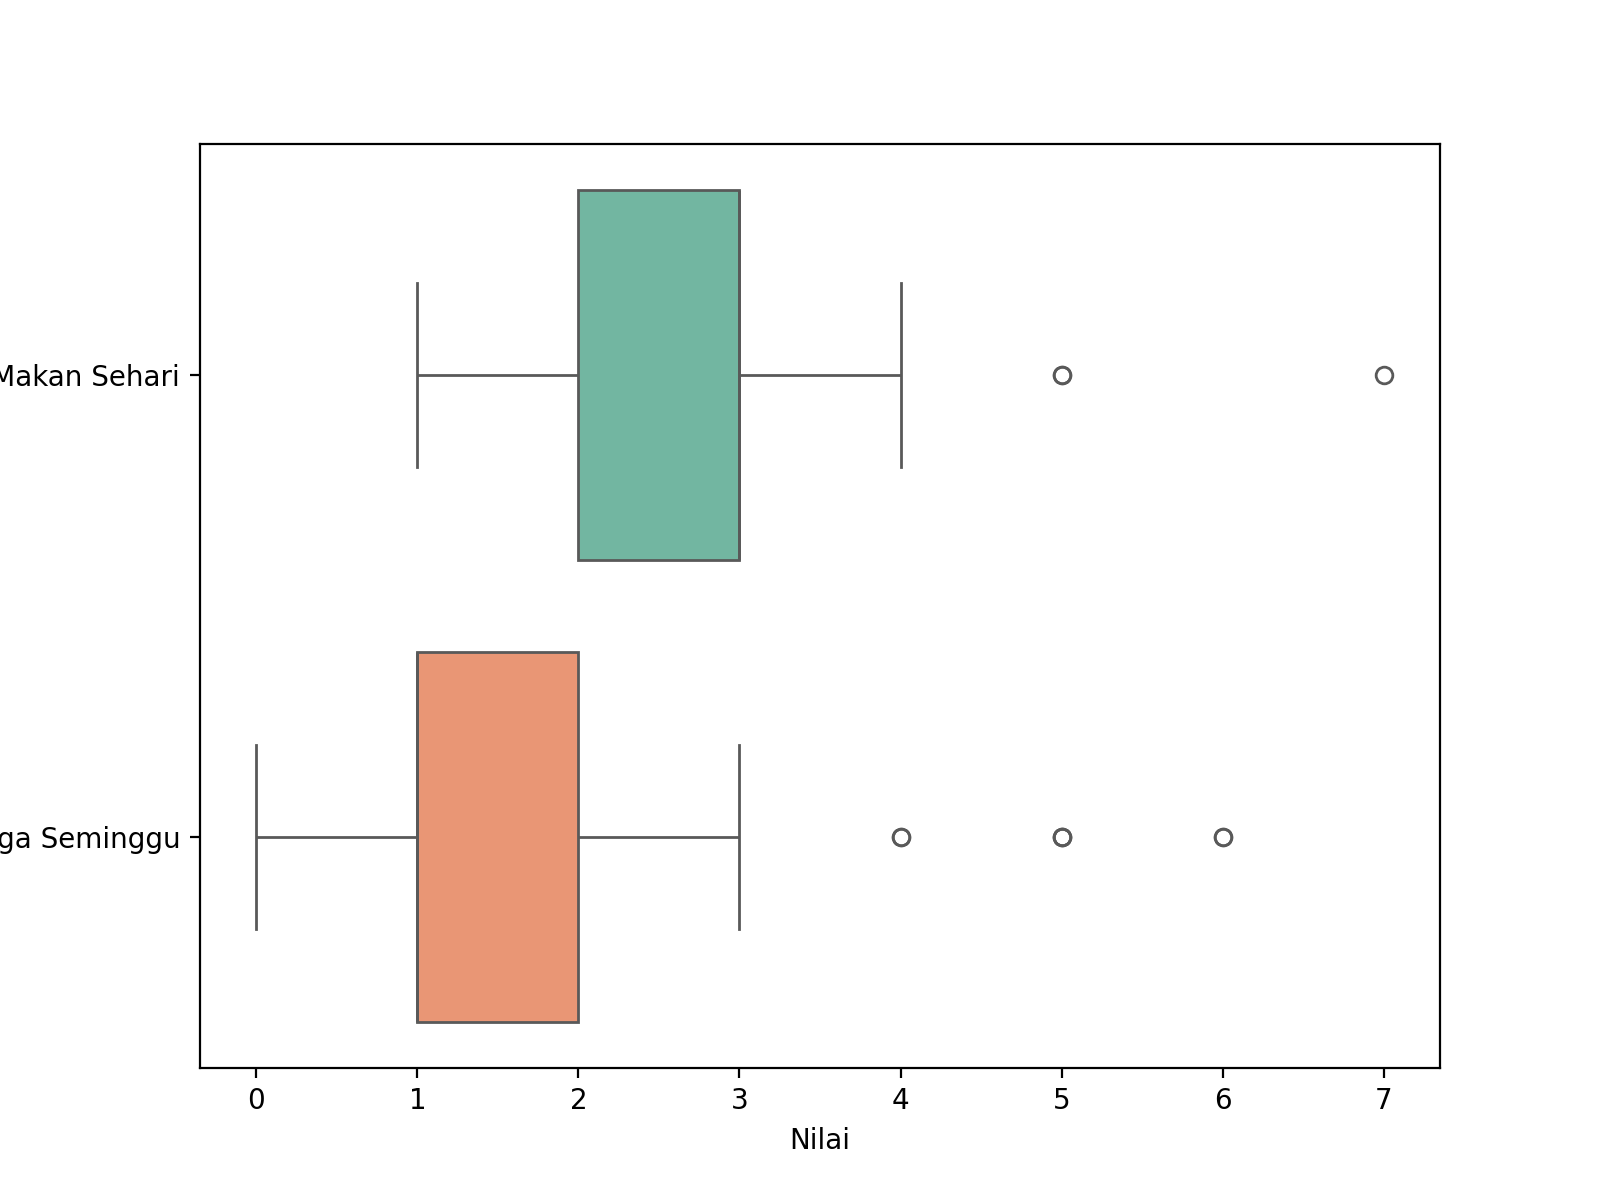

In [117]:
# Outlier

plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['Jumlah Makan Sehari','Total Olahraga Seminggu']], orient="h", palette="Set2")
plt.xlabel("Nilai")

plt.show()

In [118]:
# Penanganan Outlier
def replace_outliers_with_mean(series):
    mean = series.mean()
    std = series.std()
    threshold = 2.0

    series[abs(series - mean) > threshold * std] = mean
    return series

# Mengganti outlier dengan rata-rata
data['Jumlah Makan Sehari'] = replace_outliers_with_mean(data['Jumlah Makan Sehari'])
data['Total Olahraga Seminggu'] = replace_outliers_with_mean(data['Total Olahraga Seminggu'])

C:\Users\Daffa\AppData\Local\Temp\ipykernel_21276\102213646.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Daffa\AppData\Local\Temp\ipykernel_21276\102213646.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.6419753086419755' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
C:\Users\Daffa\AppData\Local\Temp\ipykernel_21276\102213646.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Daffa\AppData\Local\Temp\ipykernel_21276\102213646.py:7: FutureWarning: Setting an item of incompatible dt

In [119]:
# Ordinal
ordinal_cols = ["Tingkat Kepentingan Memilih Makanan"]
ordinal_cols_2 = ["Total Olahraga Seminggu","Jumlah Makan Sehari"]

for col in ordinal_cols:
    data[col] = data[col].map({"Sangat penting": 4, "Penting": 3, "Kurang penting": 2, "Tidak penting": 1})

ordinal_data = data[ordinal_cols + ordinal_cols_2]
label_encoder = LabelEncoder()
ordinal_data_encoded = ordinal_data.apply(label_encoder.fit_transform)


# Binary
binary_cols = ["Alergi Makanan"]
binary_cols_2 = ["Melewatkan Sarapan"]
binary_cols_3 = ["Pola Makan Teratur"]
binary_cols_4 = ["Jenis Makanan Favorit"]

data[binary_cols_4] = data[binary_cols_4].applymap(lambda x: 1 if x == "Makanan sehat" else 0)
data[binary_cols] = data[binary_cols].applymap(lambda x: 1 if x == "Tidak" else 0)
for col in binary_cols_2:
    data[col] = data[col].map({"Tidak": 1, "Iya": 0})
for col in binary_cols_3:
    data[col] = data[col].map({"Tidak": 0, "Iya": 1})

binary_data = data[binary_cols + binary_cols_2 + binary_cols_3 + binary_cols_4]



C:\Users\Daffa\AppData\Local\Temp\ipykernel_21276\3141163292.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
C:\Users\Daffa\AppData\Local\Temp\ipykernel_21276\3141163292.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


c:\Users\Daffa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
c:\Users\Daffa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
c:\Users\Daffa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
c:\Users\Daffa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


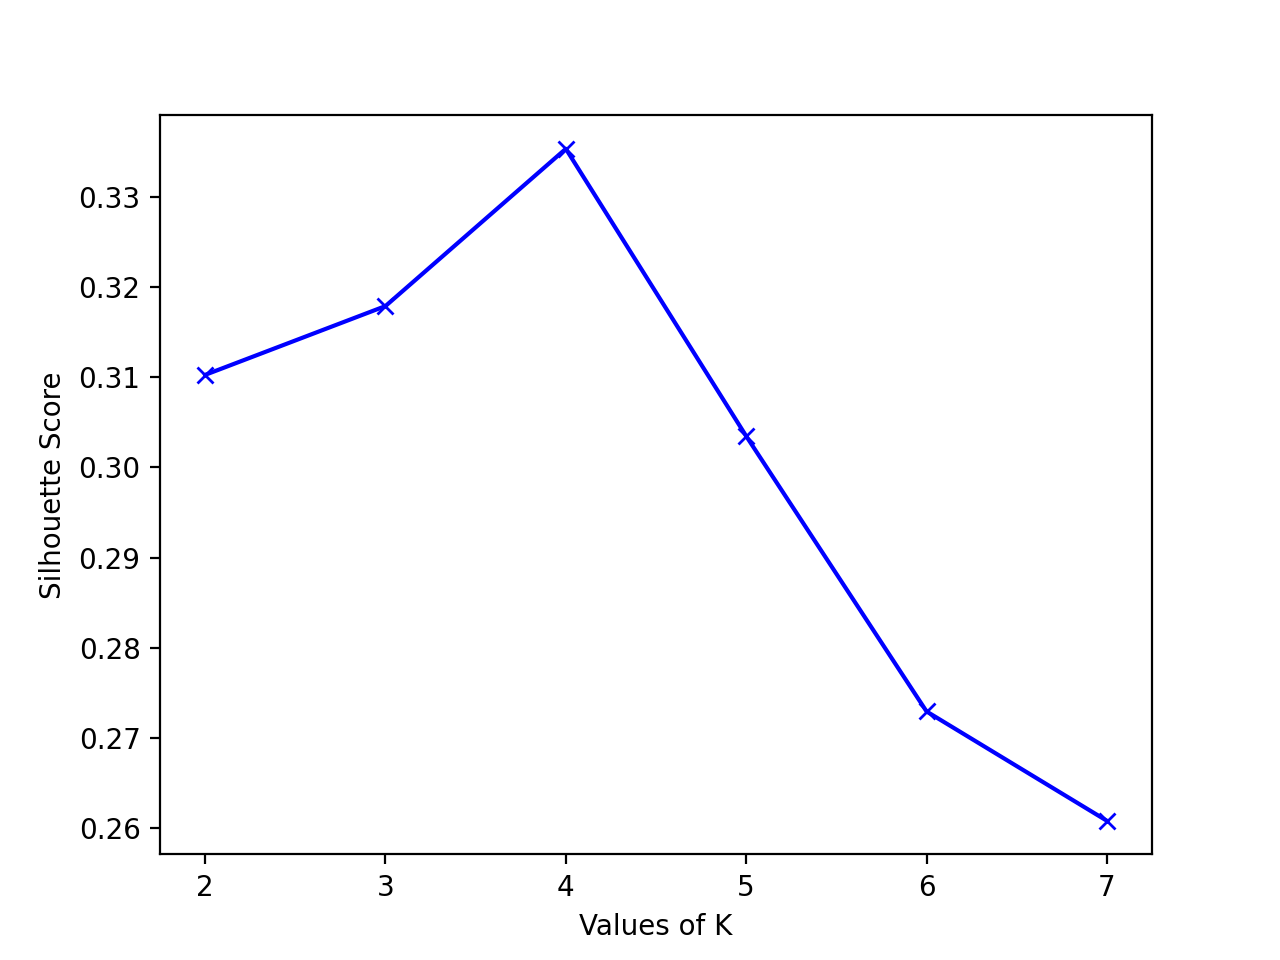

In [120]:
# Penggabungan
data_preprocessed = pd.concat([ordinal_data_encoded,binary_data], axis=1)
fits = []
score = []
K = range(2, 8)

for i in K:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_preprocessed)
    cluster_labels = kmeans.labels_
    
    score.append(silhouette_score(data_preprocessed, cluster_labels))
plt.plot(K, score, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.show()


In [121]:
data_preprocessed = pd.concat([ordinal_data_encoded,binary_data], axis=1)
kmeans = KMeans(n_clusters=4, random_state=0)
data['Klasifikasi'] = kmeans.fit_predict(data_preprocessed)

# Hasil
data['Klasifikasi'] = data['Klasifikasi']
data

c:\Users\Daffa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


,Timestamp,Nama,Jenis Kelamin,Usia,Jenis Makanan Favorit,Alergi Makanan,Melewatkan Sarapan,Jumlah Makan Sehari,Pola Makan Teratur,Tingkat Kepentingan Memilih Makanan,Total Olahraga Seminggu,Klasifikasi
0,28/09/2023 13:56:57,Rizfi Ferdiansyah,Laki - laki,20,1,1,1,3.0,1,3,1.0,3
1,28/09/2023 15:11:05,Praja Muhammad Purnayuda,Laki - laki,20,0,1,0,2.0,0,2,0.0,1
2,28/09/2023 15:11:46,Thomas Gianto,Laki - laki,18,1,1,1,4.0,1,3,2.0,0
3,28/09/2023 15:12:21,Abrar Ikrama Putra,Laki - laki,20,0,1,0,3.0,0,4,1.0,3
4,29/09/2023 9:54:07,Adit,Laki - laki,20,0,1,0,2.0,1,3,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
76,12/10/2023 8:40:14,Iqbal,Laki - laki,22,0,1,0,2.0,0,3,1.0,1
77,12/10/2023 8:40:46,Muhammad Naufal,Laki - laki,21,0,1,1,4.0,1,4,2.0,0
78,12/10/2023 8:41:41,Kemal Fahrezi,Laki - laki,19,0,1,0,3.0,0,2,0.0,3
79,12/10/2023 8:42:21,Novia,Perempuan,22,1,1,1,3.0,1,3,1.0,3


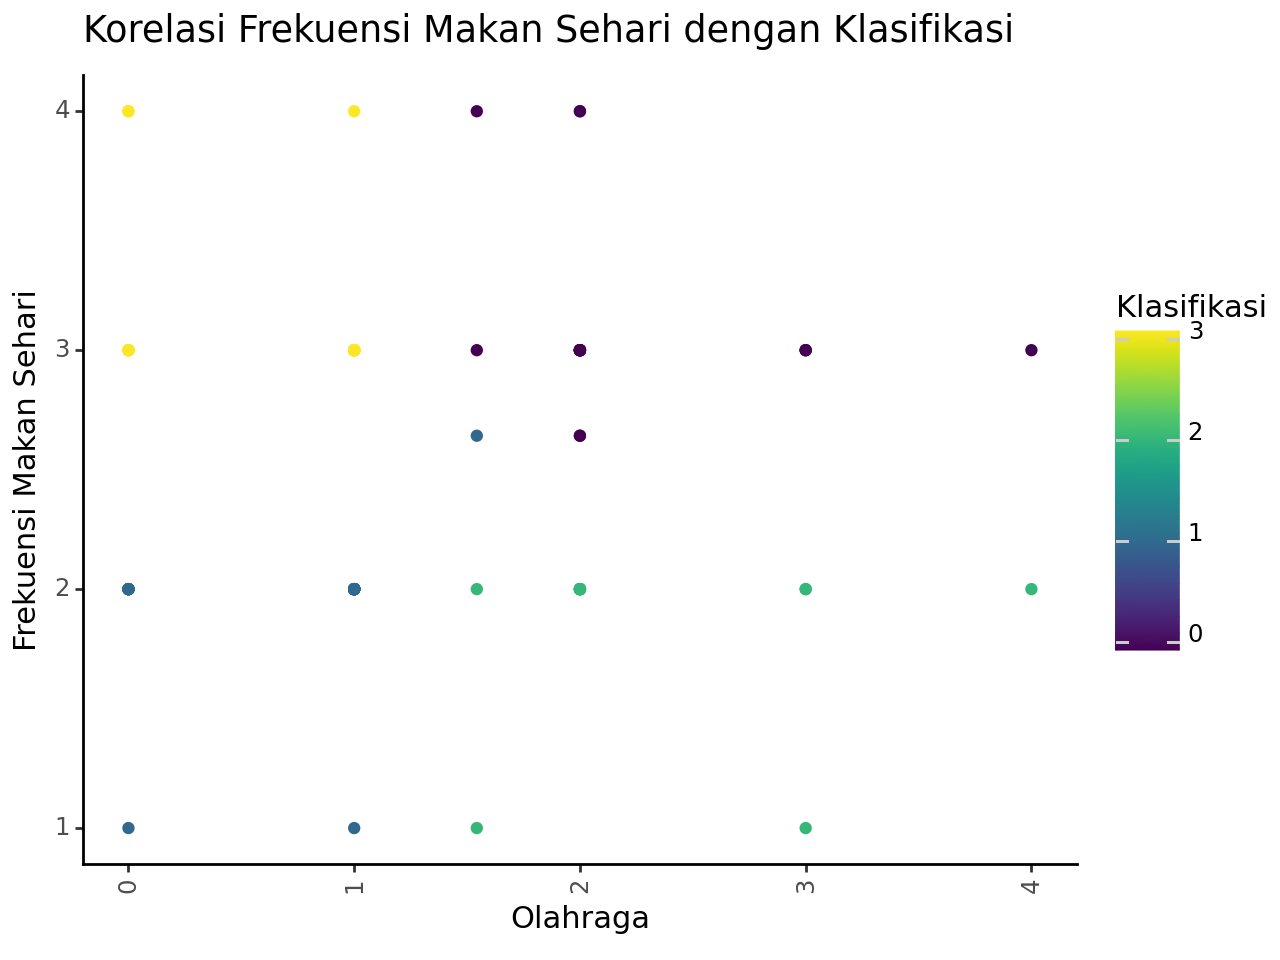

In [122]:
print(
    p9.ggplot(p9.aes(x=data['Total Olahraga Seminggu'], y=data['Jumlah Makan Sehari'])) +
    p9.geom_point(p9.aes(color=data['Klasifikasi'])) +
    p9.theme_classic() +
    p9.ggtitle('Korelasi Frekuensi Makan Sehari dengan Klasifikasi') +
    p9.xlab('Olahraga') +
    p9.ylab('Frekuensi Makan Sehari') +
    p9.theme(axis_text_x=p9.element_text(angle=90))
)


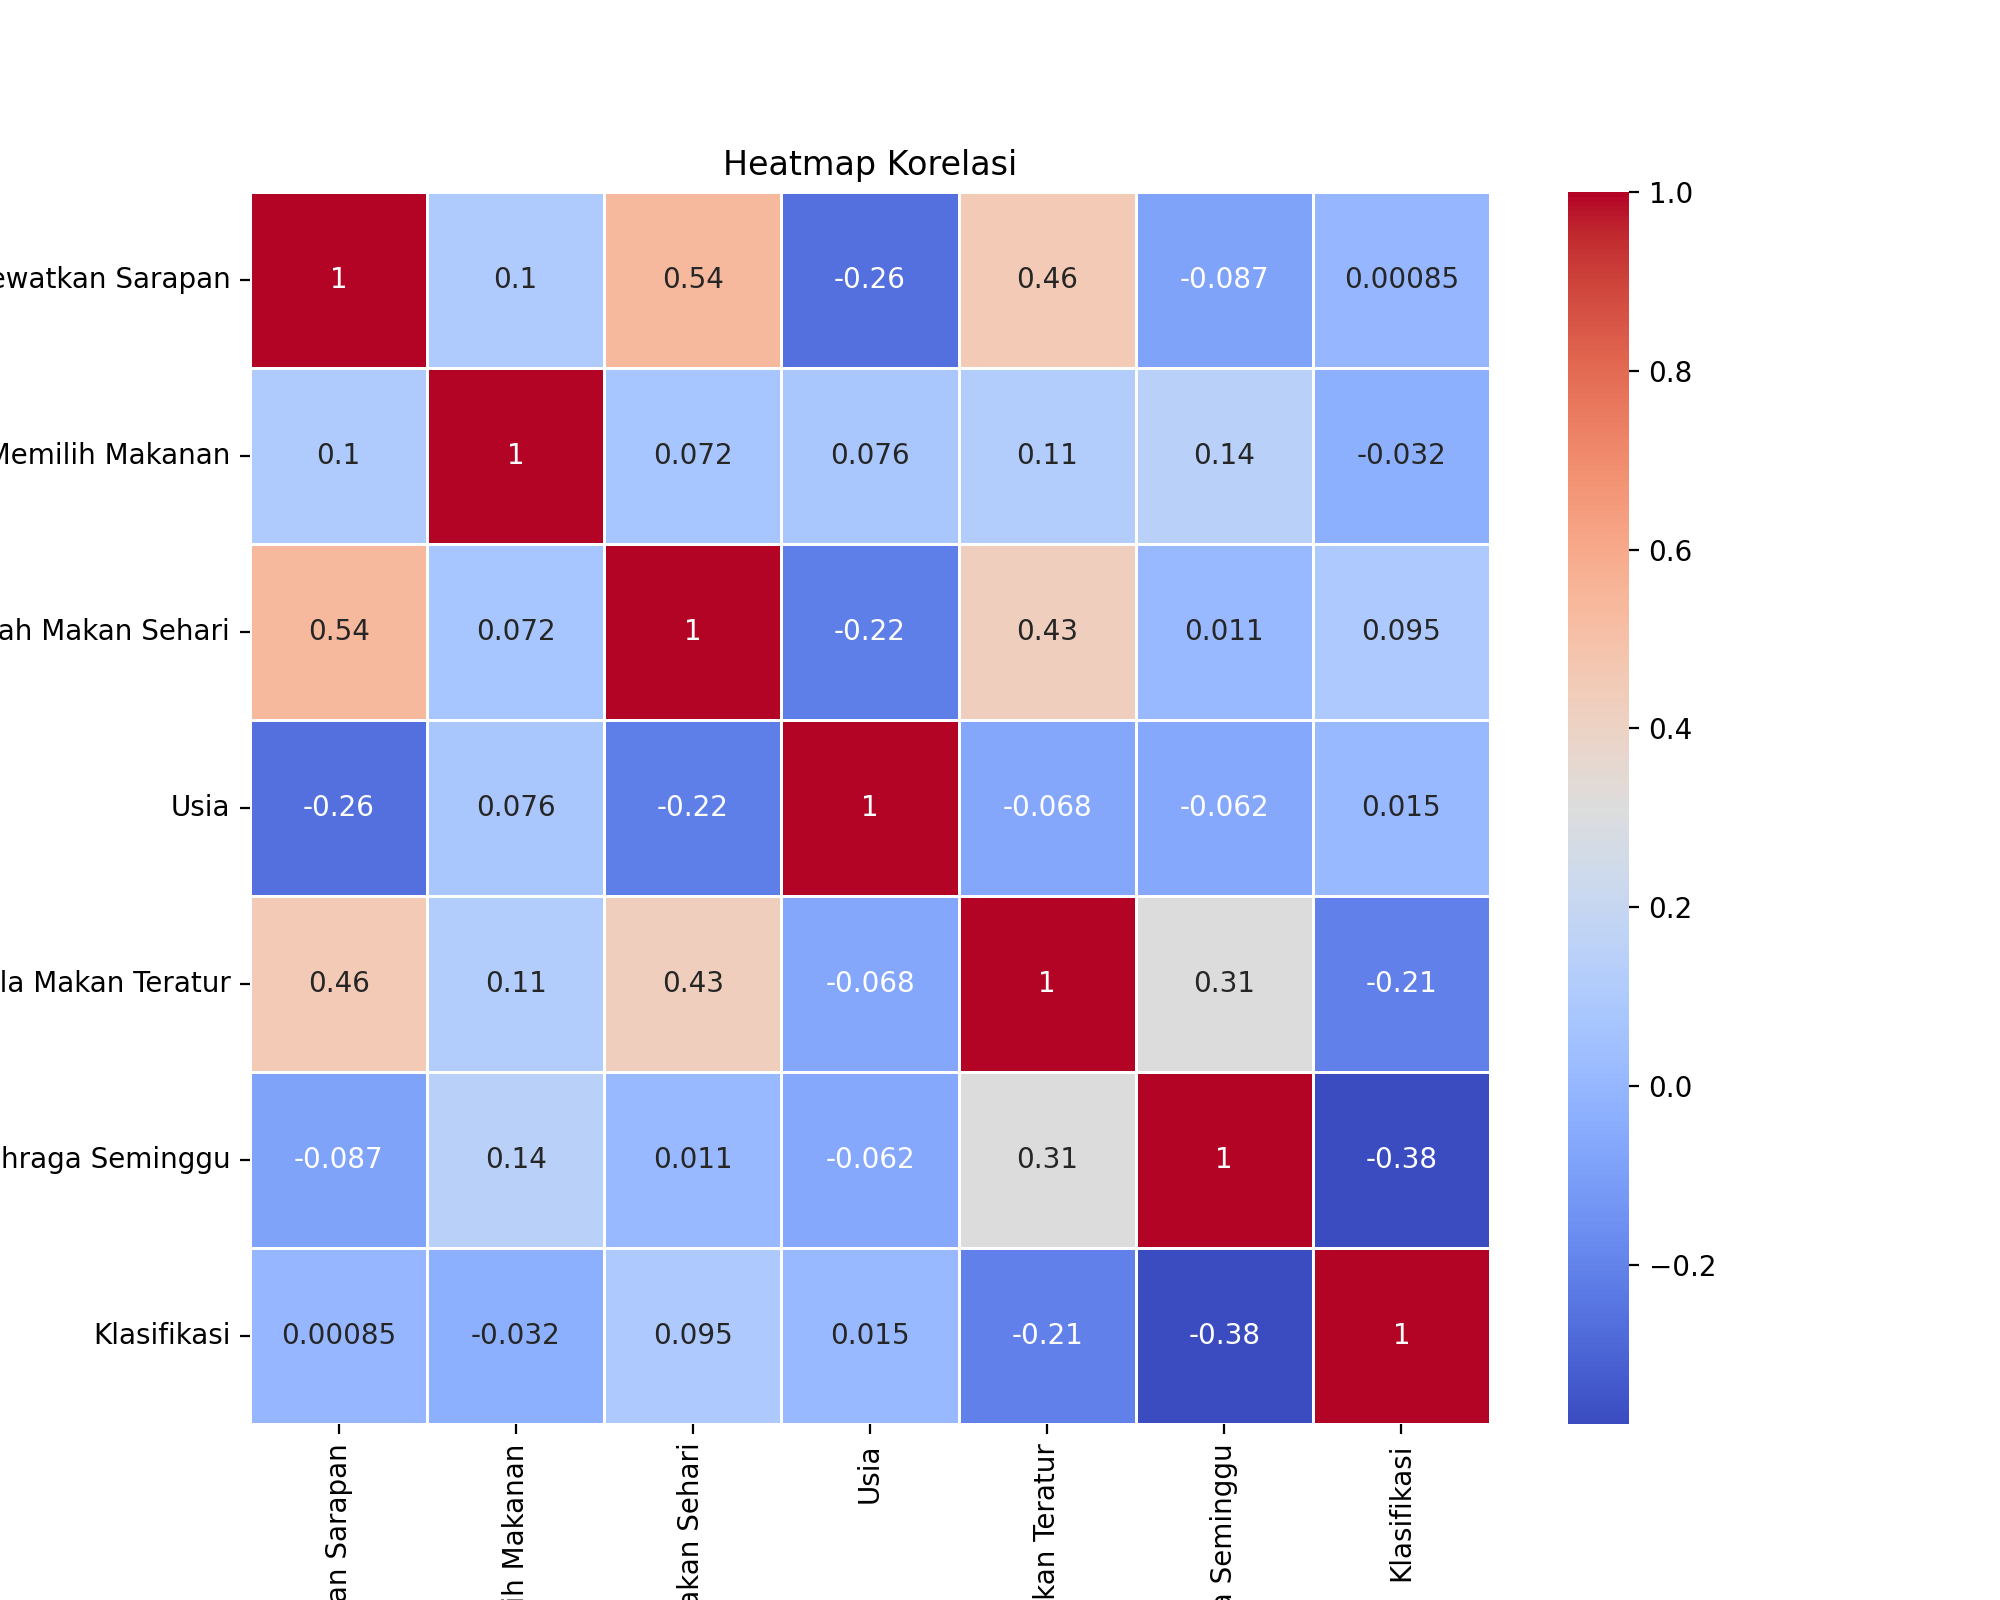

In [123]:
# Heatmap
selected_columns = data[['Melewatkan Sarapan','Tingkat Kepentingan Memilih Makanan','Jumlah Makan Sehari','Usia','Pola Makan Teratur','Total Olahraga Seminggu','Klasifikasi']]
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()


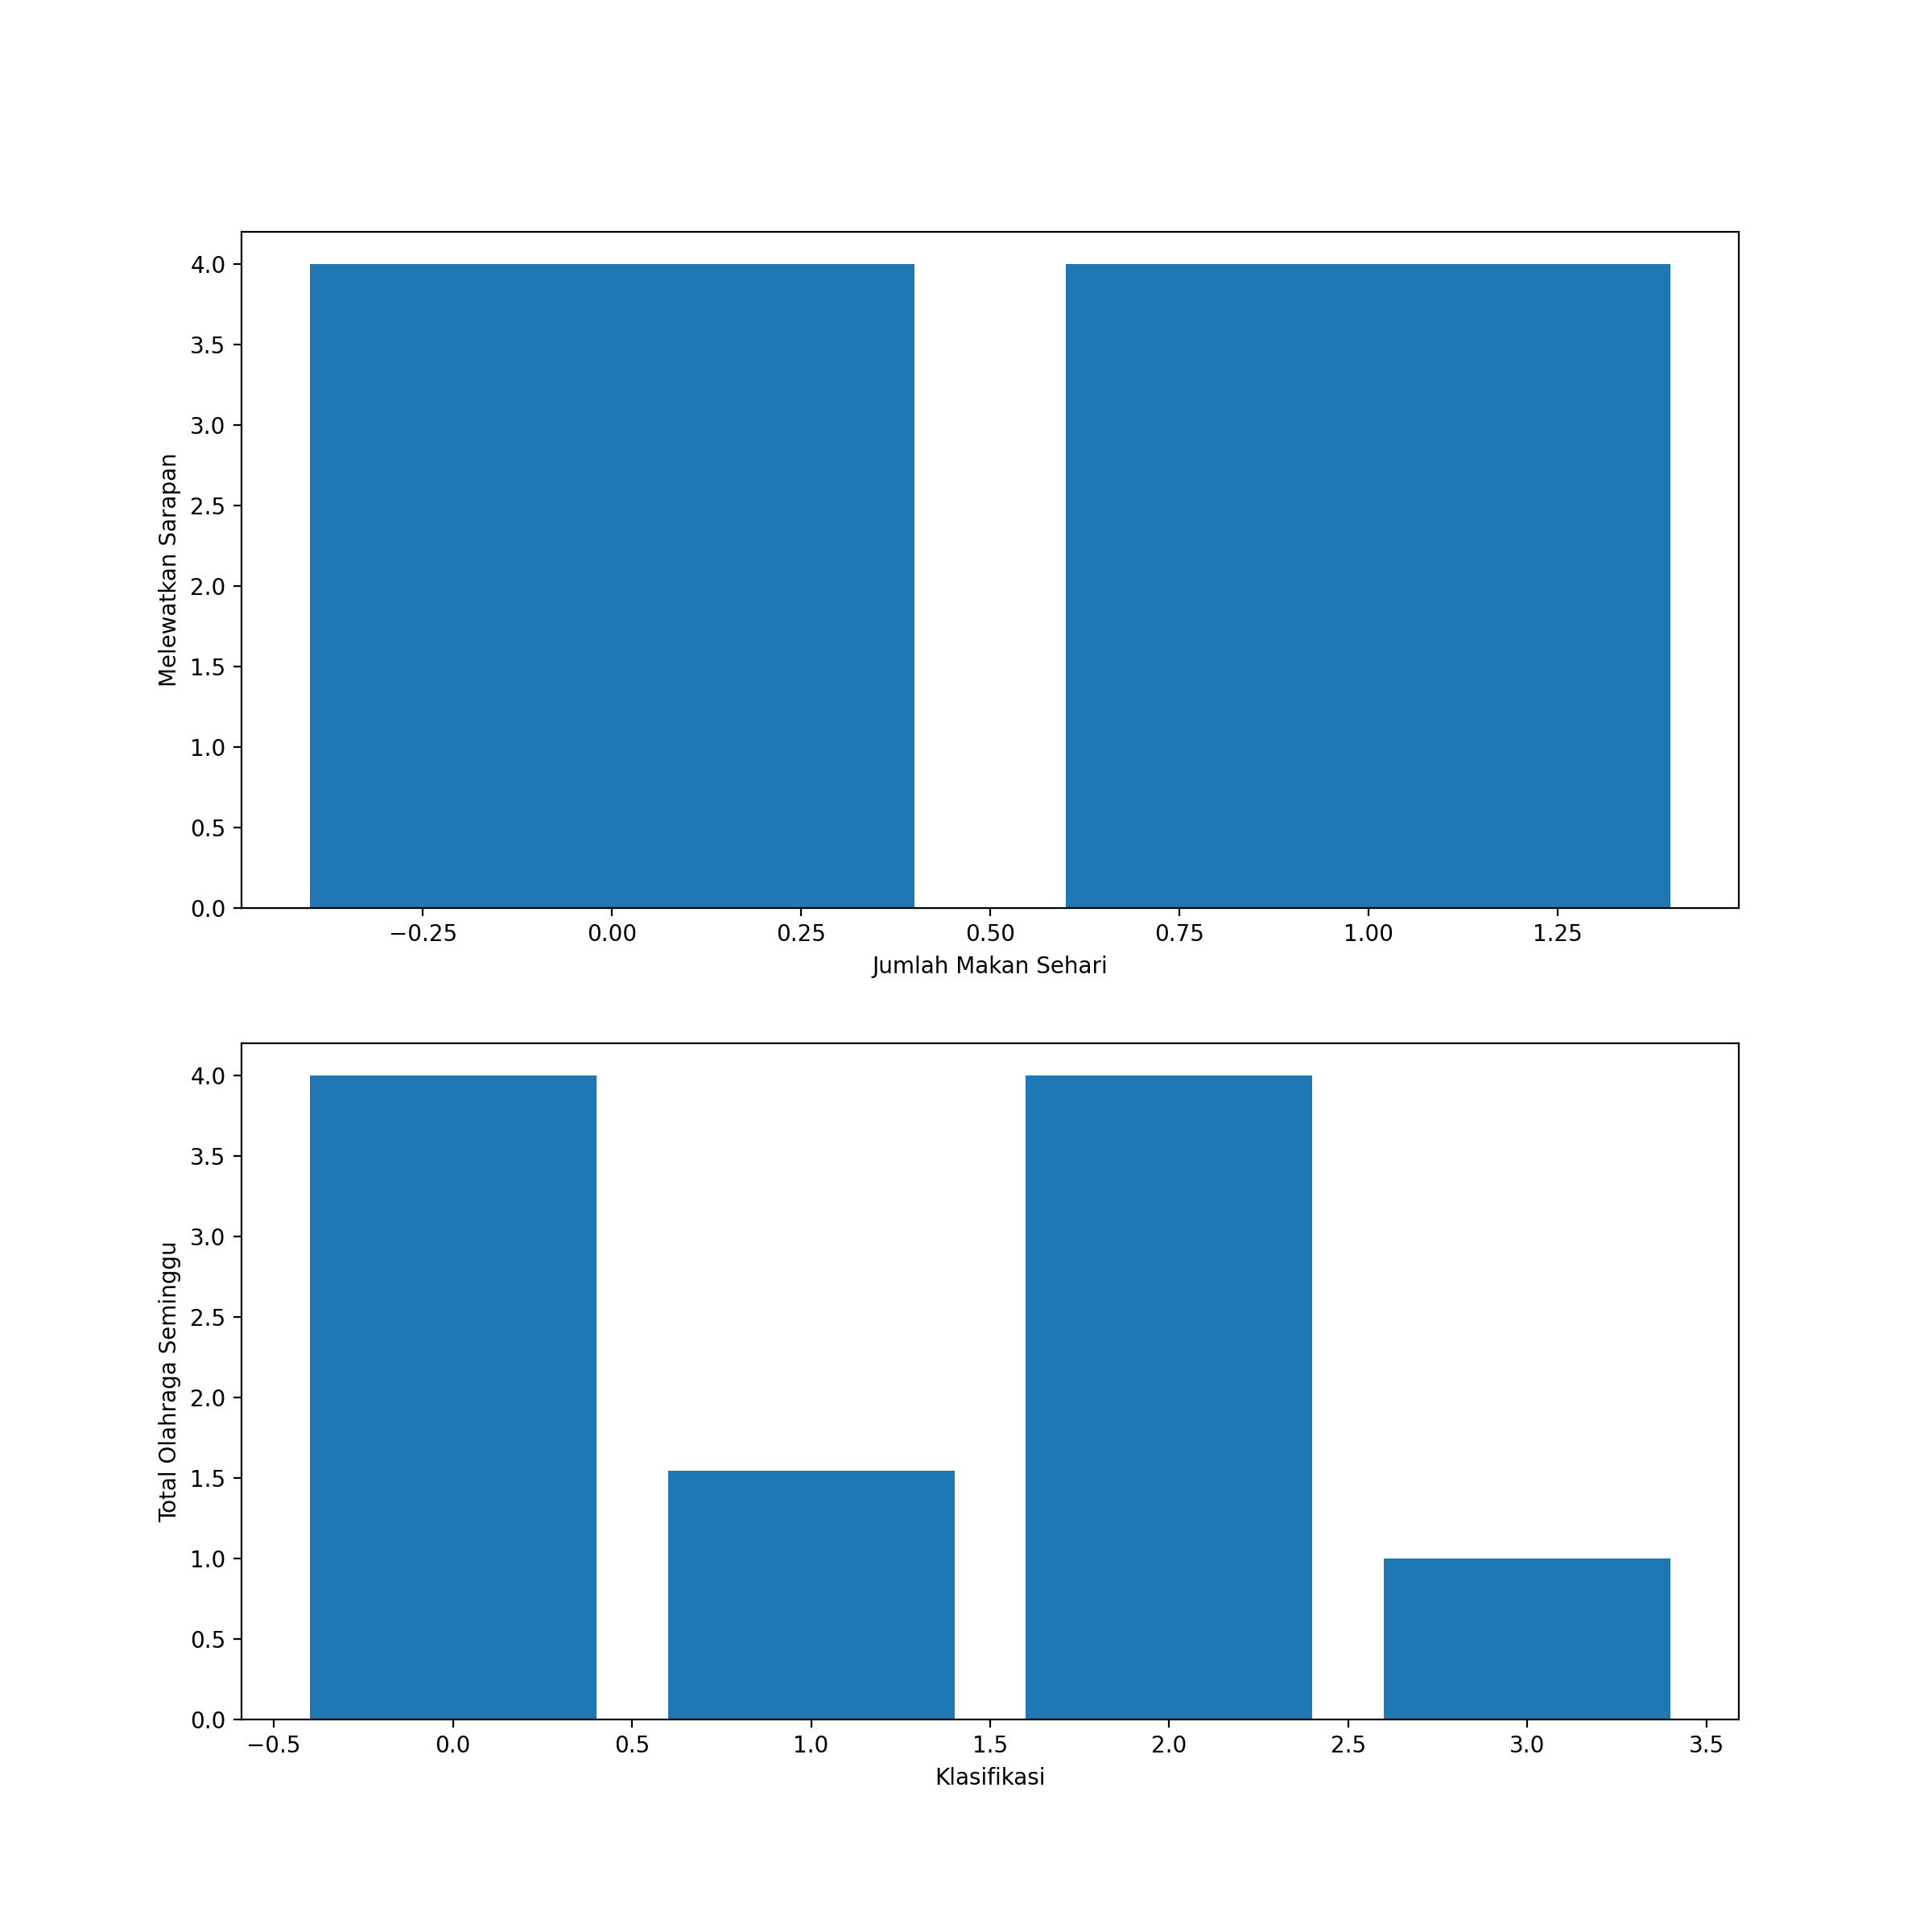

In [124]:
# Diagram Batang 2D
fig = plt.figure(figsize=(12,12))
ax = fig.subplots(2, 1)
x = 'Melewatkan Sarapan'
y = 'Jumlah Makan Sehari'

ax[0].bar(data[x], data[y])
ax[0].set_ylabel(x)
ax[0].set_xlabel(y)

x = 'Klasifikasi'
y = 'Total Olahraga Seminggu'

ax[1].bar(data[x], data[y])
ax[1].set_xlabel(x)
ax[1].set_ylabel(y)

plt.show()

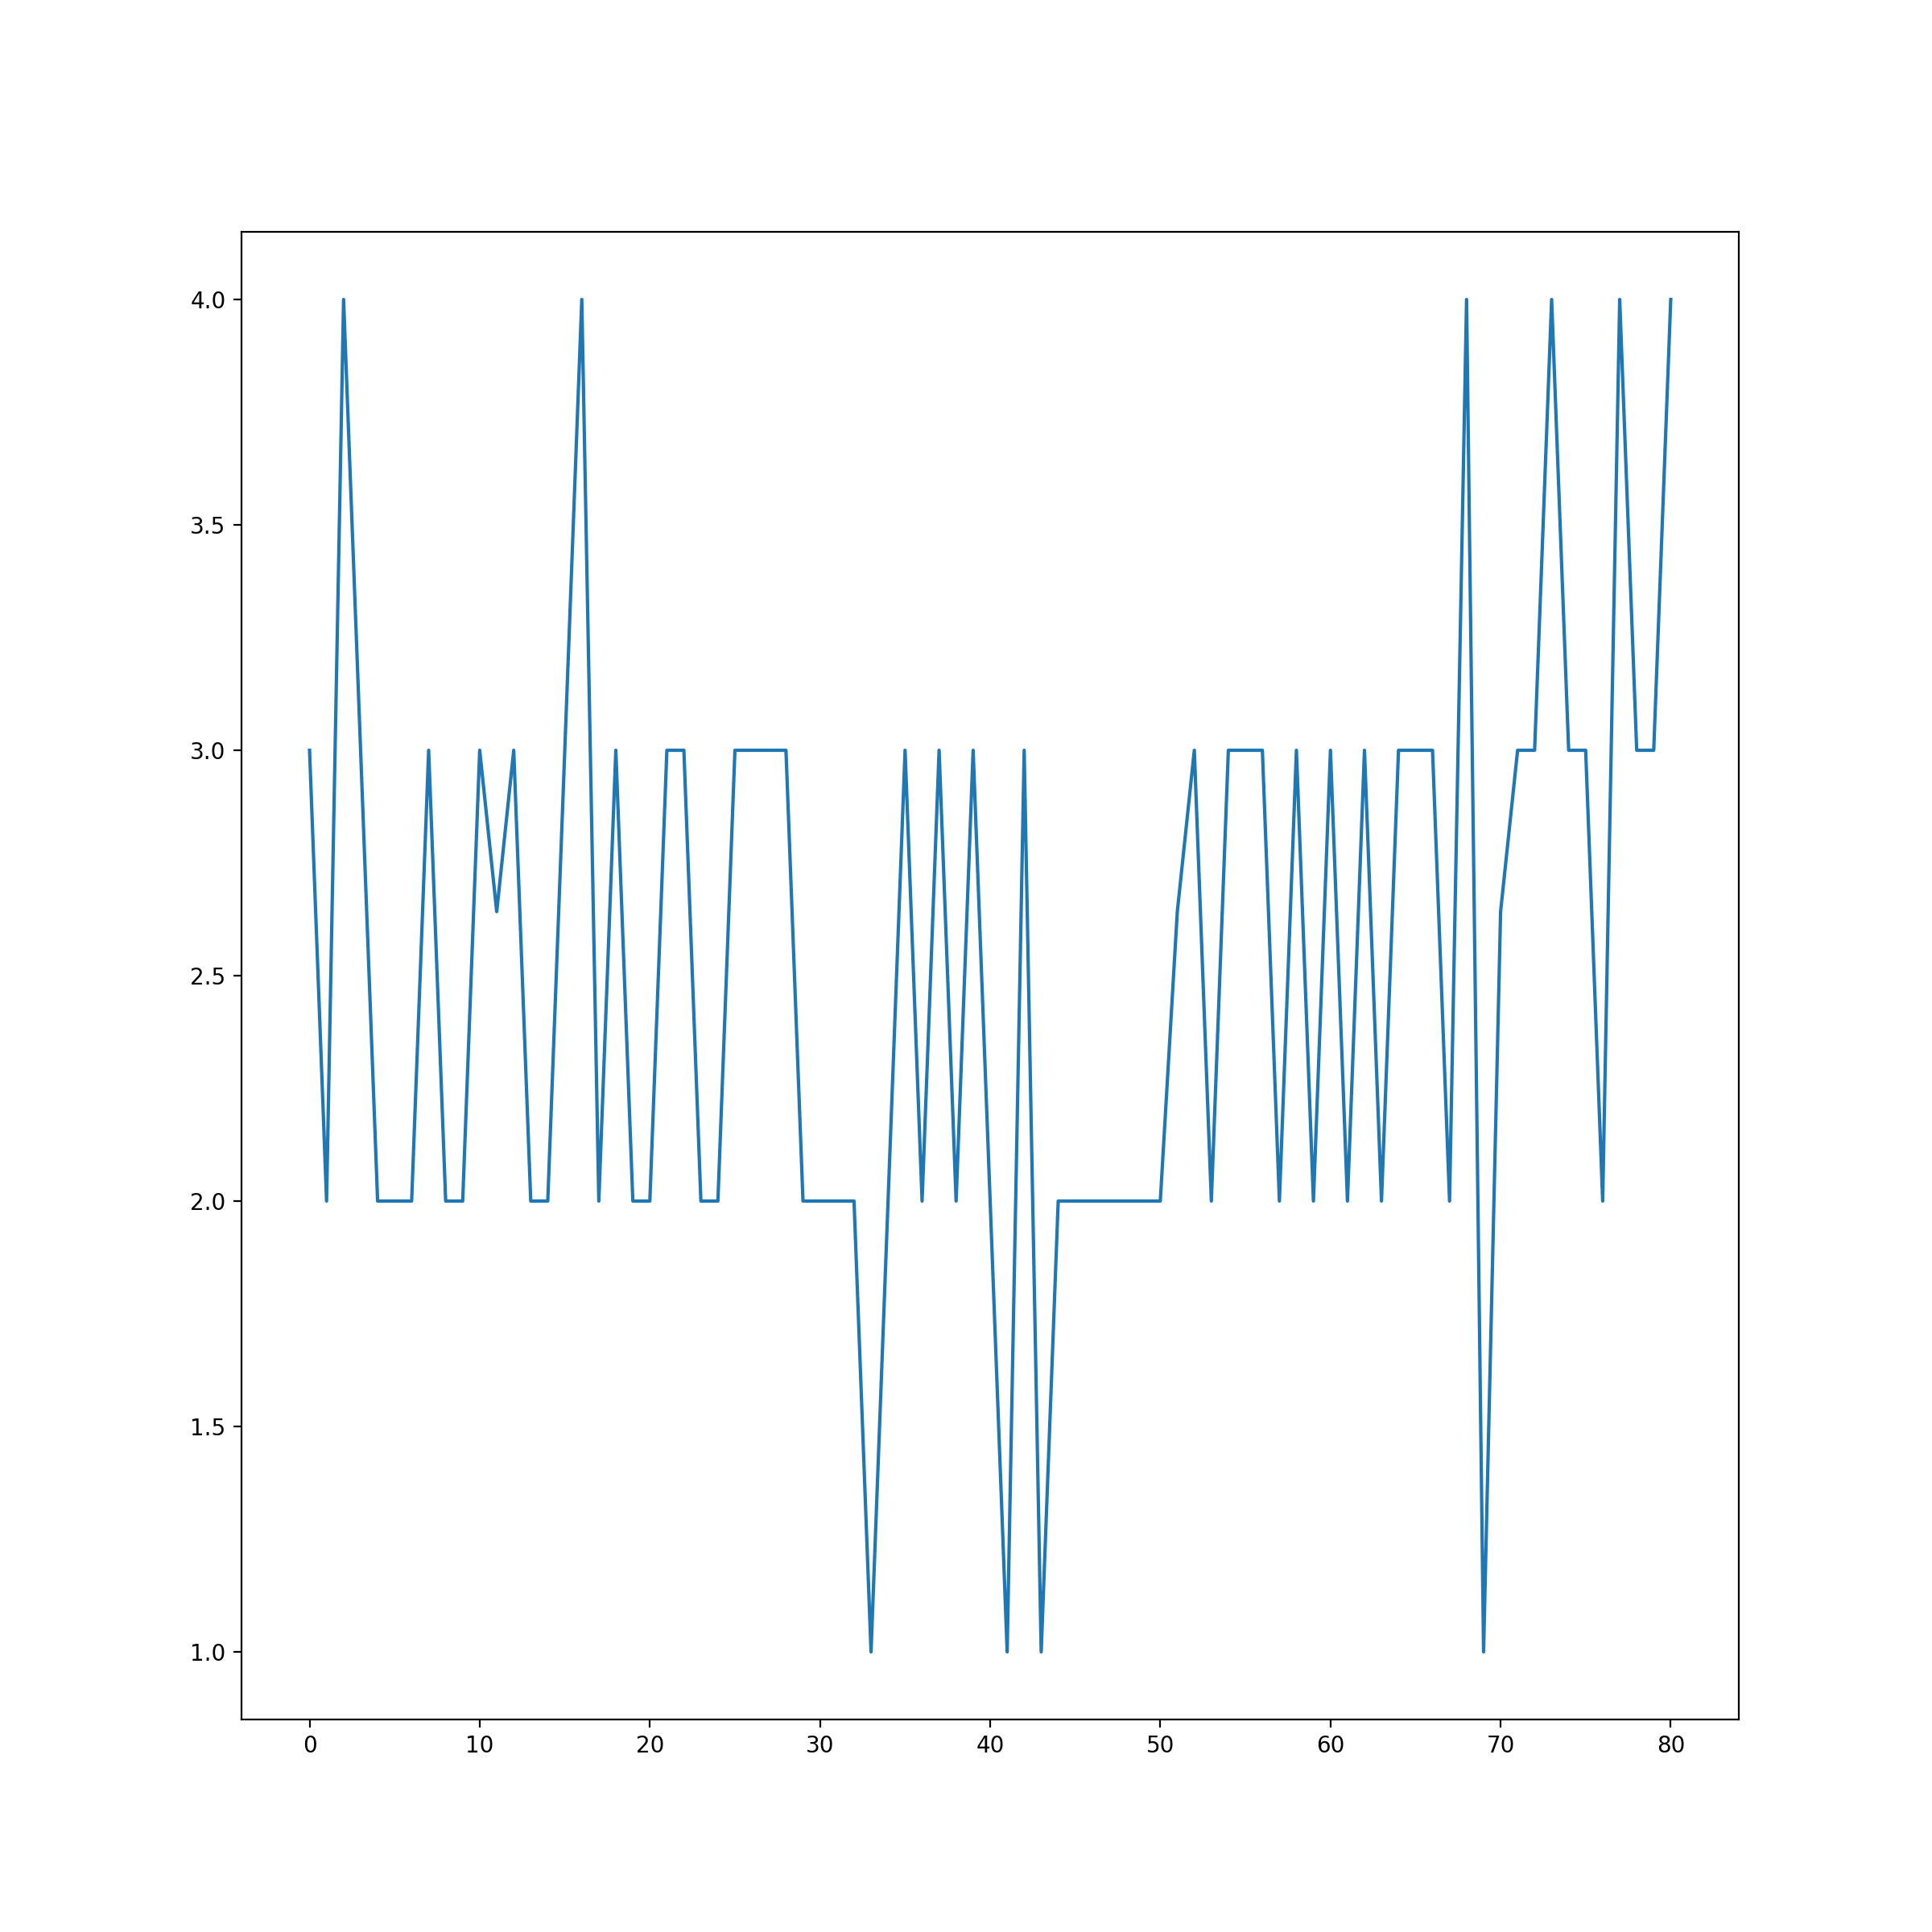

In [125]:
# Garis
fig = plt.figure(figsize=(12,12))
ax = fig.subplots()

ax.plot(data['Jumlah Makan Sehari'])

([<matplotlib.patches.Wedge at 0x23bed6593d0>,
 [Text(-0.47452459424774285, 0.992384204556892, 'True'),
  Text(0.4745245013340259, -0.9923842489850866, 'False')],
 [Text(-0.25883159686240514, 0.5413004752128501, '64.2%'),
  Text(0.2588315461821959, -0.5413004994464108, '35.8%')])

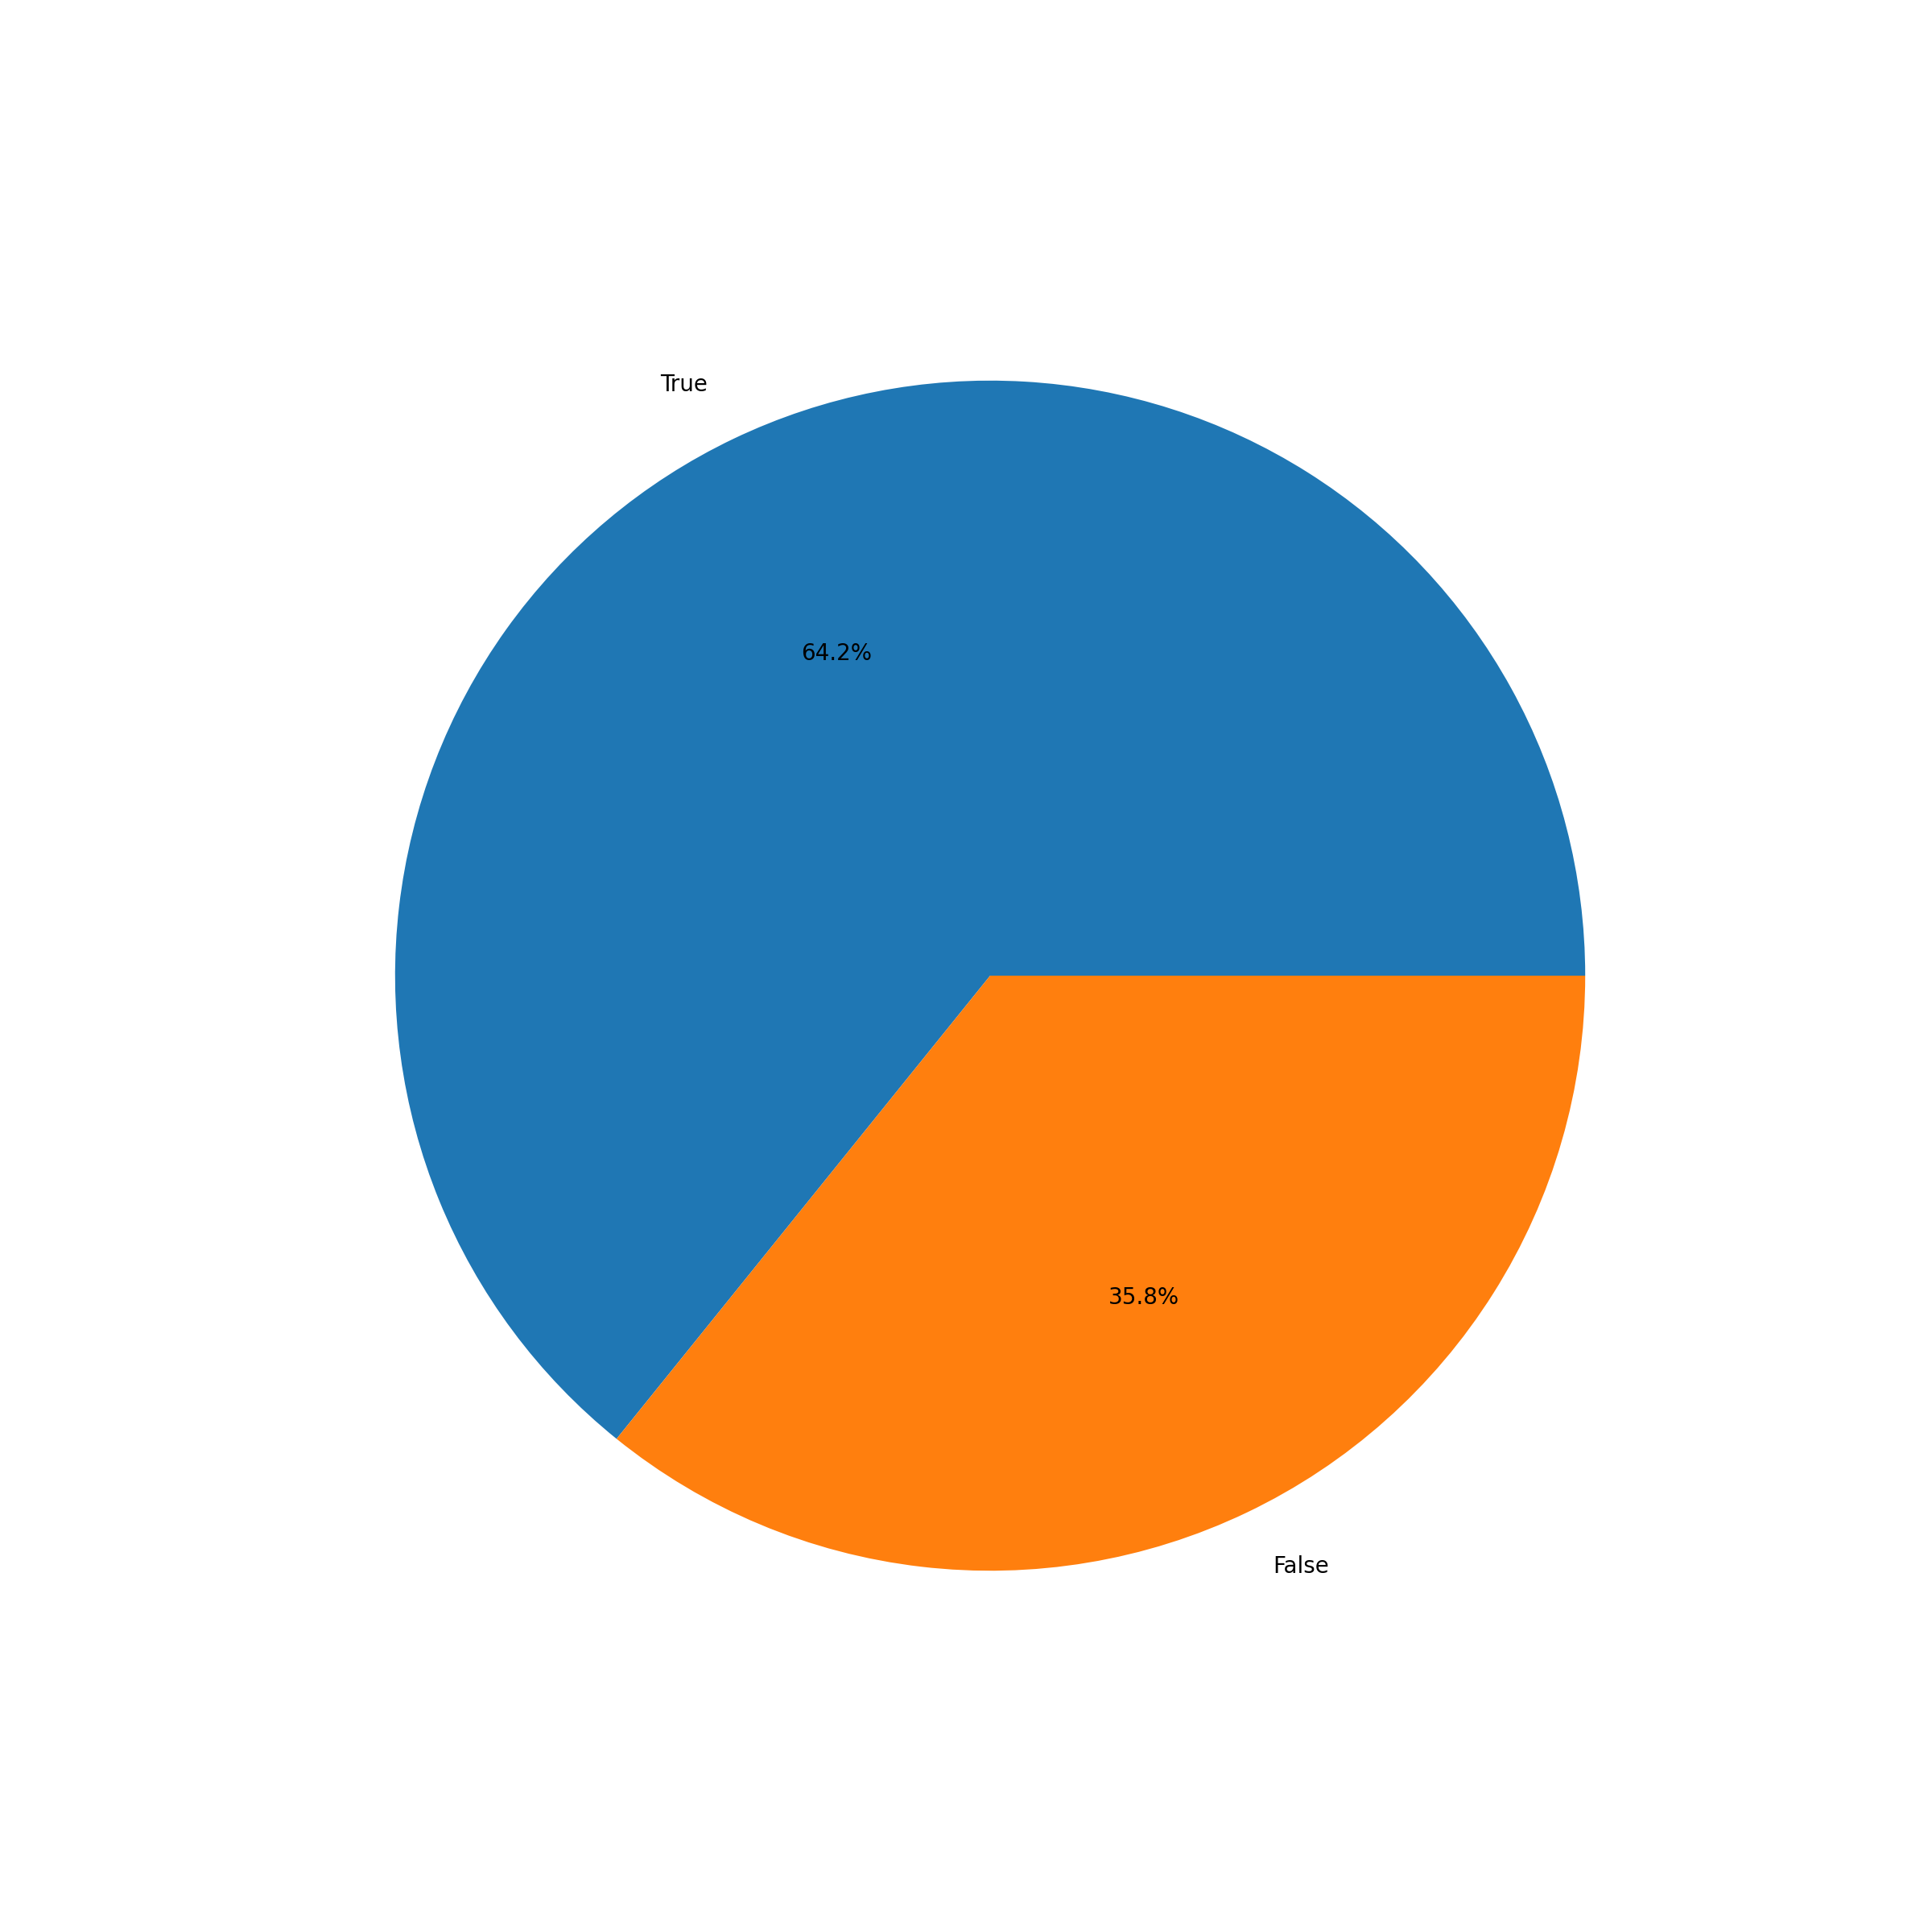

In [126]:
# Pie
fig = plt.figure(figsize=(12,12))
ax = fig.subplots()

data['Melewatkan Sarapan'] = data['Melewatkan Sarapan'].replace({0:False, 1:True})

ax.pie(data['Melewatkan Sarapan'].value_counts(), labels=data['Melewatkan Sarapan'].unique(), autopct='%1.1f%%')

<Figure size 1200x1200 with 0 Axes>

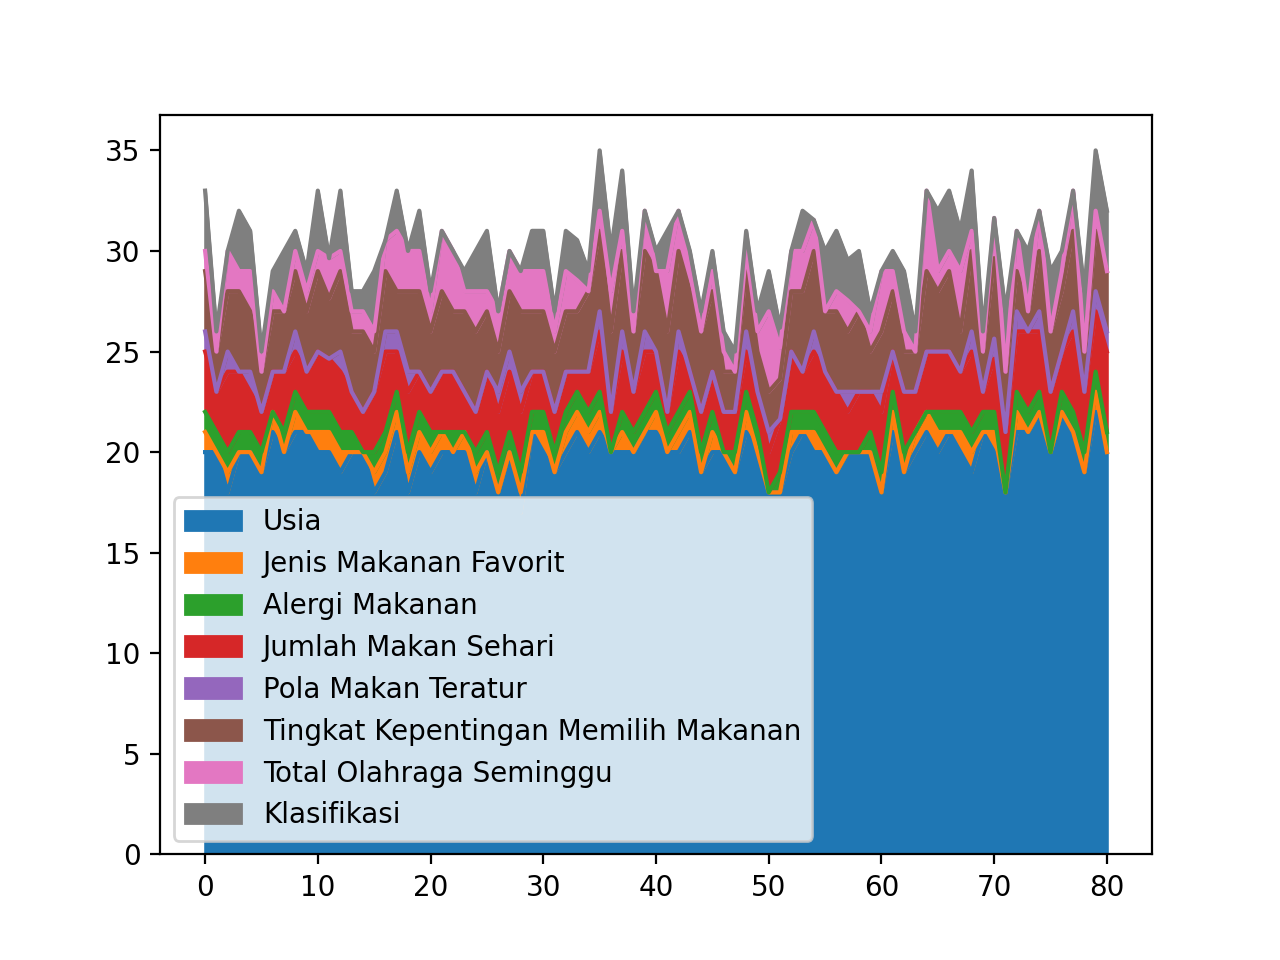

In [127]:
# Area
fig = plt.figure(figsize=(12,12))

ax = data.plot.area()

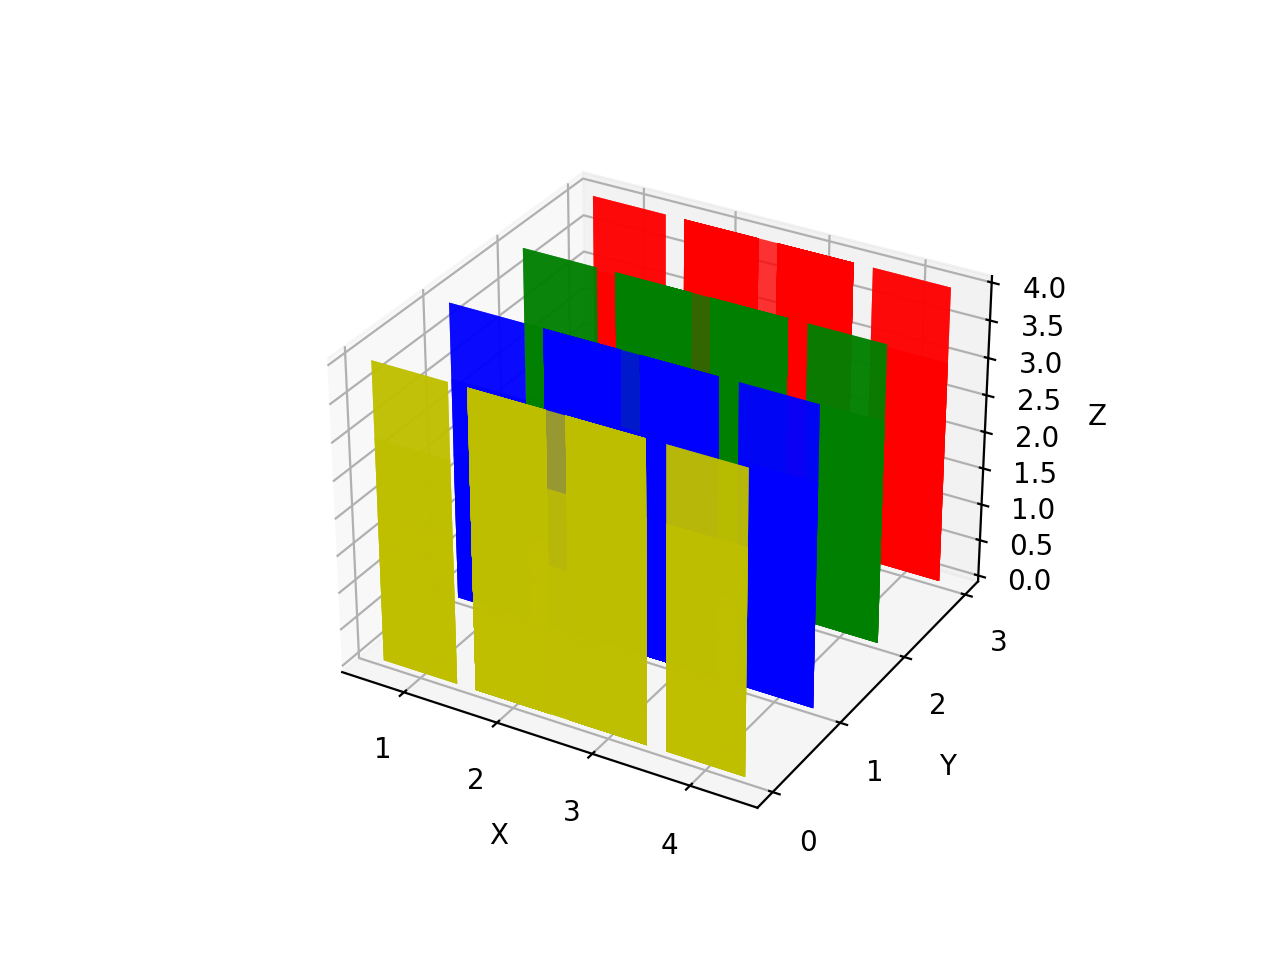

In [128]:
#3D Bar Plot
# data['Melewatkan Sarapan'] = data['Melewatkan Sarapan'].replace({False:0, True:1})
data_new = data[['Jumlah Makan Sehari', 'Tingkat Kepentingan Memilih Makanan']]
colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_yticks(yticks)

for c, k in zip(colors, yticks):
  xs = data_new['Jumlah Makan Sehari']
  ys = data_new['Tingkat Kepentingan Memilih Makanan']

  cs = [c] * len(xs)
  cs[0] = 'c'

  ax.bar(xs, ys, zs=k, zdir='y',
            color=cs, alpha=0.8)

plt.show()

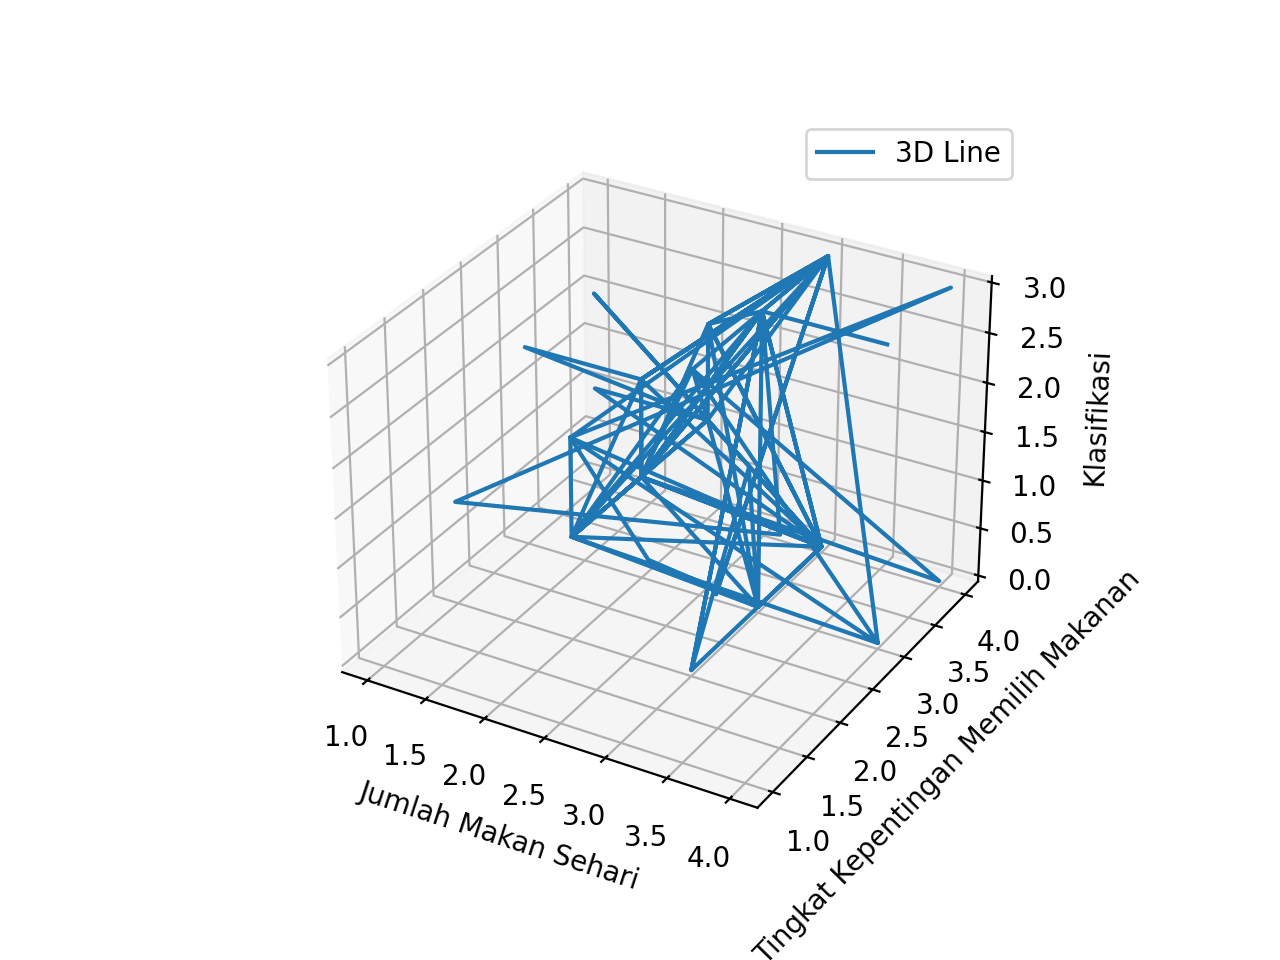

In [129]:
# 3D Line Chart
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(data['Jumlah Makan Sehari'], data['Tingkat Kepentingan Memilih Makanan'], data['Klasifikasi'], label='3D Line')

ax.set_xlabel('Jumlah Makan Sehari')
ax.set_ylabel('Tingkat Kepentingan Memilih Makanan')
ax.set_zlabel('Klasifikasi')
ax.legend()

plt.show()

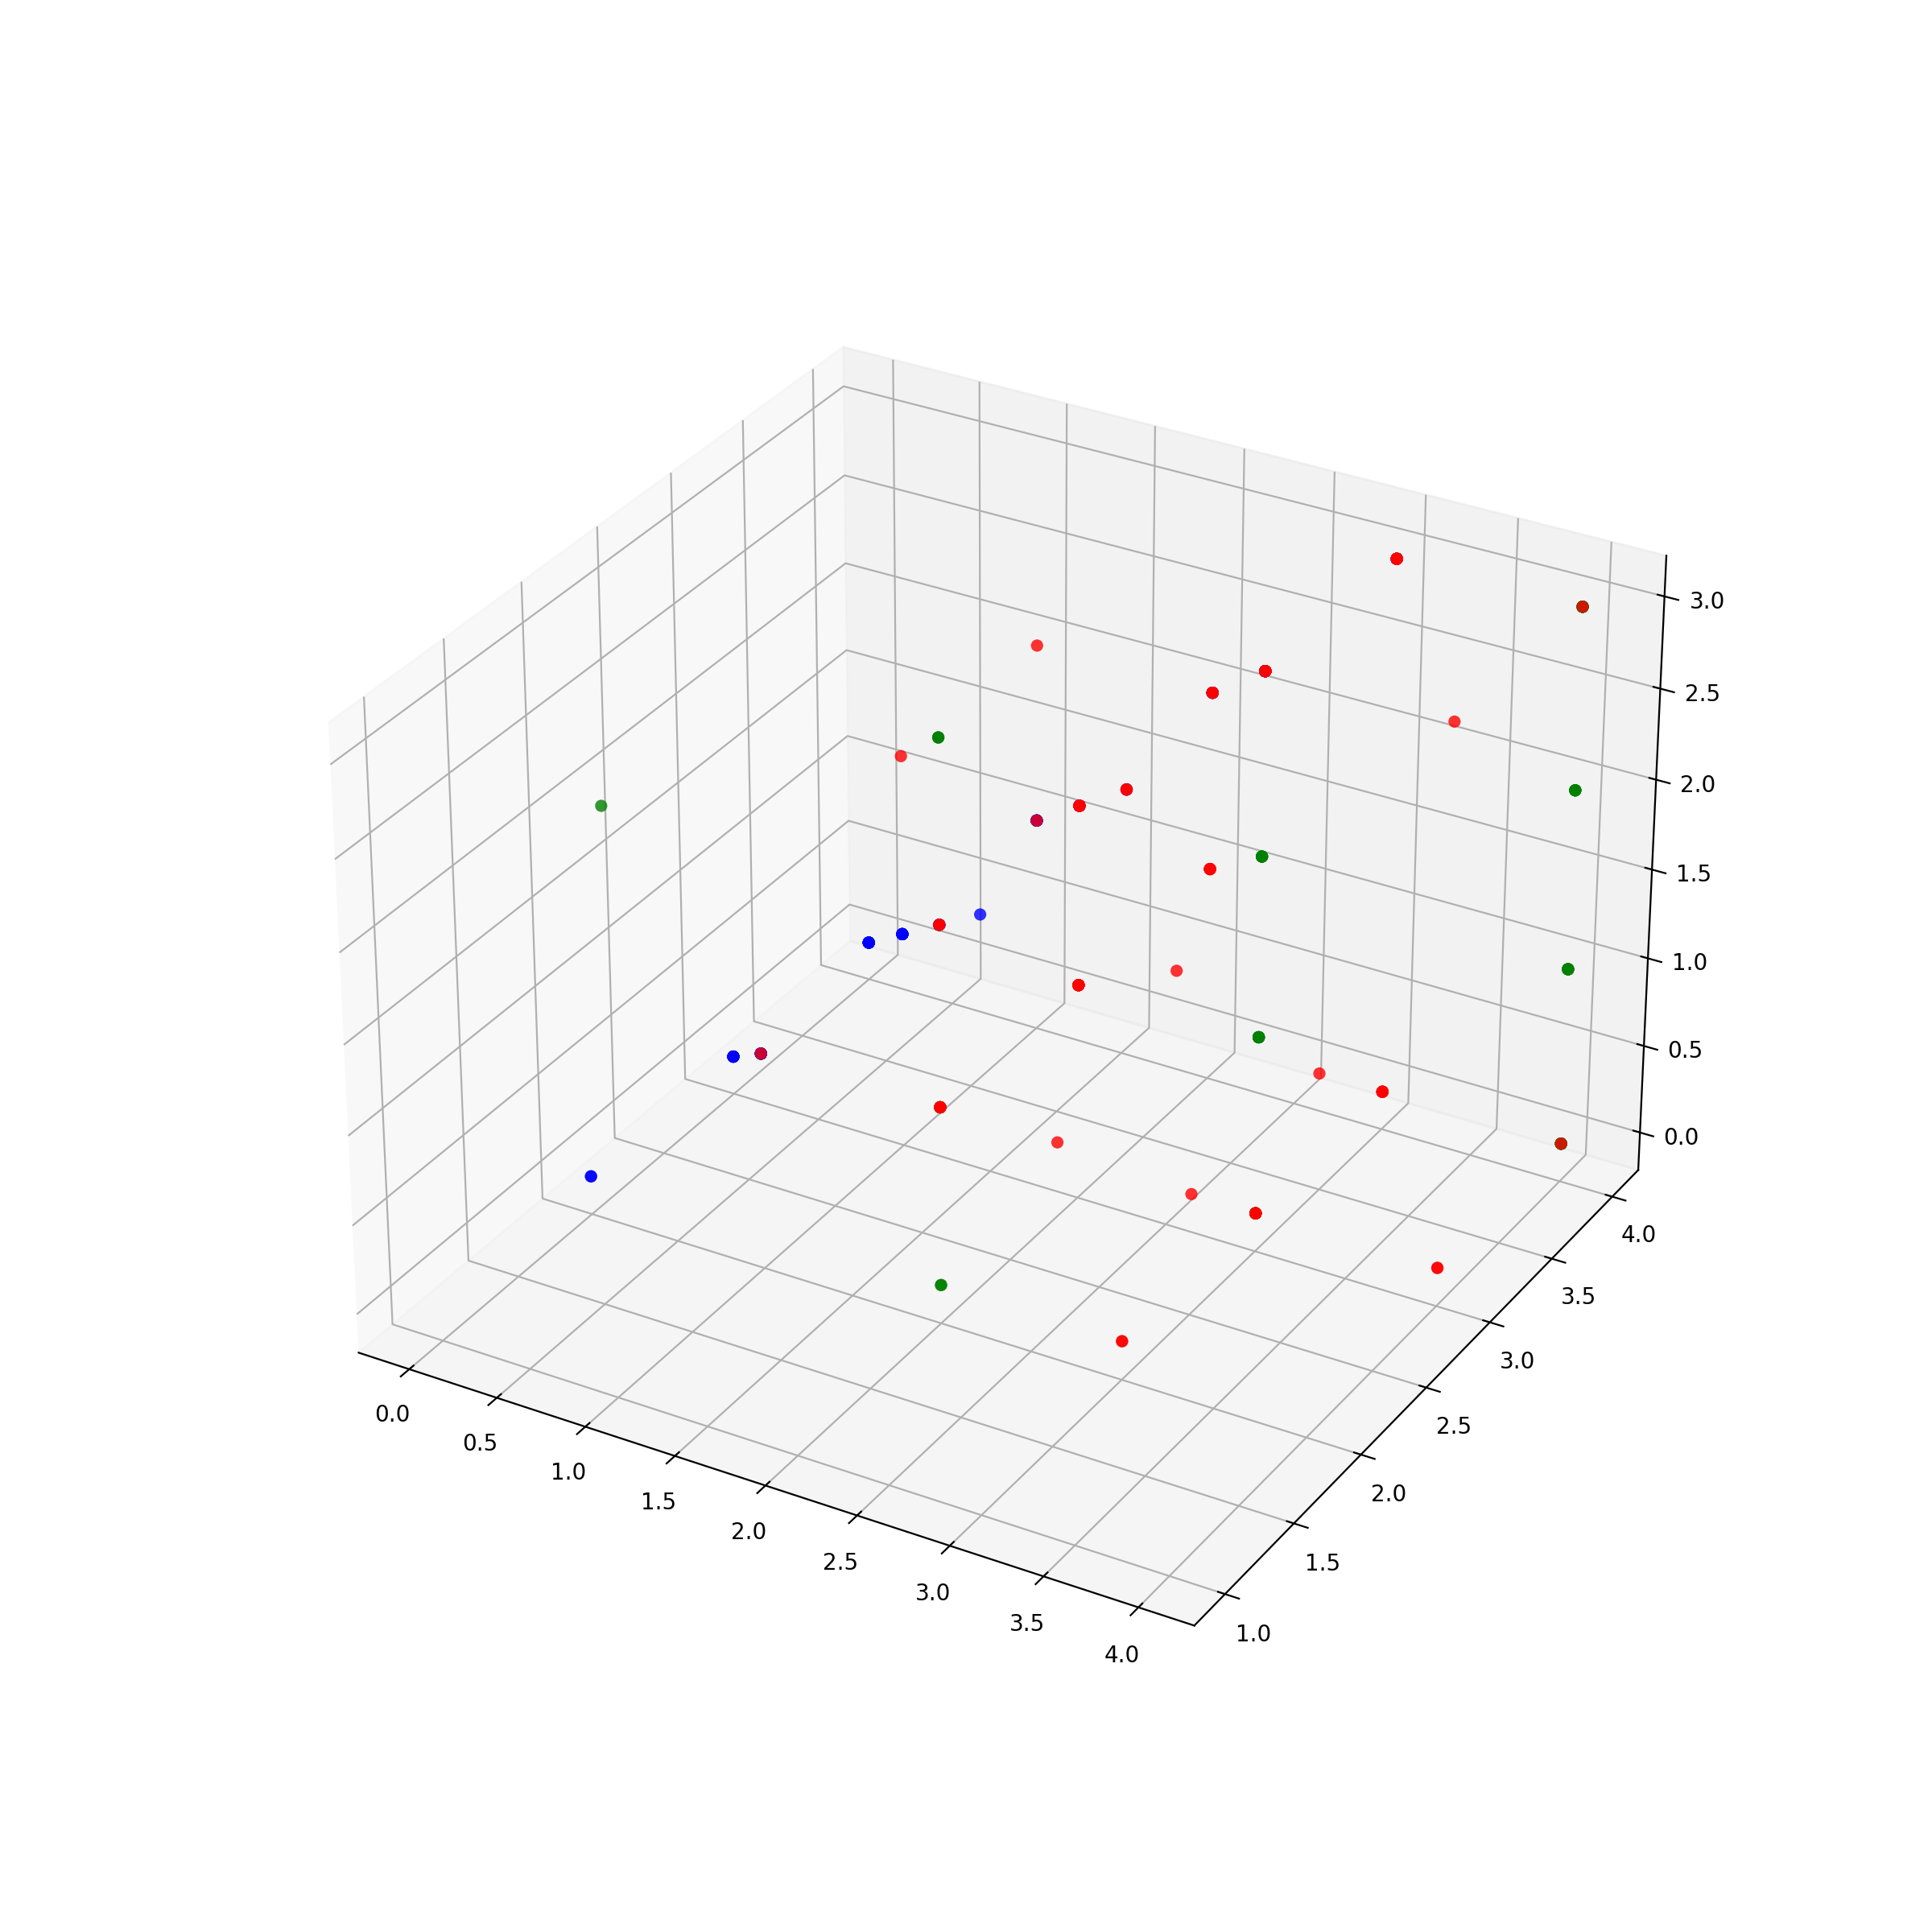

In [130]:
#3D Scatter Plot
dx = data['Jumlah Makan Sehari']
dy = data['Tingkat Kepentingan Memilih Makanan']
dz = data['Klasifikasi']

datas = [dx, dy, dz]
colors = ('red', 'green', 'blue')
groups = ('Jumlah Makan Sehari', 'Tingkat Kepentingan Memilih Makanan', 'Klasifikasi')

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection='3d')
# ax = fig.gca(projection='3d')

for df, color, group in zip(datas, colors, groups):
    # x, y, z = data
    ax.scatter(df, dy, dz, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

# Classification

In [131]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz 


In [132]:
x = data_preprocessed[['Melewatkan Sarapan', 'Jumlah Makan Sehari', 'Total Olahraga Seminggu']]
y = data['Klasifikasi']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=125) 

## Naive Bayes

In [133]:
nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

acc_score = metrics.accuracy_score(y_pred, y_test)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', acc_score)
print('F1 Score: ', f1_score)

Accuracy:  0.8
F1 Score:  0.7898989898989899


## Decision Tree

In [134]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc_score = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', acc_score)
print('F1 Score: ', f1_score)


Accuracy:  0.92
F1 Score:  0.905


[Text(0.4444444444444444, 0.9, 'Jumlah Makan Sehari <= 1.5\nentropy = 1.969\nsamples = 56\nvalue = [13, 19, 11, 13]\nclass = 1'),
 Text(0.2222222222222222, 0.7, 'Total Olahraga Seminggu <= 2.0\nentropy = 0.958\nsamples = 29\nvalue = [0, 18, 11, 0]\nclass = 1'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18, 0, 0]\nclass = 1'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0]\nclass = 0'),
 Text(0.6666666666666666, 0.7, 'Total Olahraga Seminggu <= 1.5\nentropy = 1.192\nsamples = 27\nvalue = [13, 1, 0, 13]\nclass = 3'),
 Text(0.5555555555555556, 0.5, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13]\nclass = 2'),
 Text(0.7777777777777778, 0.5, 'Total Olahraga Seminggu <= 2.5\nentropy = 0.371\nsamples = 14\nvalue = [13, 1, 0, 0]\nclass = 3'),
 Text(0.6666666666666666, 0.3, 'Jumlah Makan Sehari <= 2.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1, 0, 0]\nclass = 3'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nv

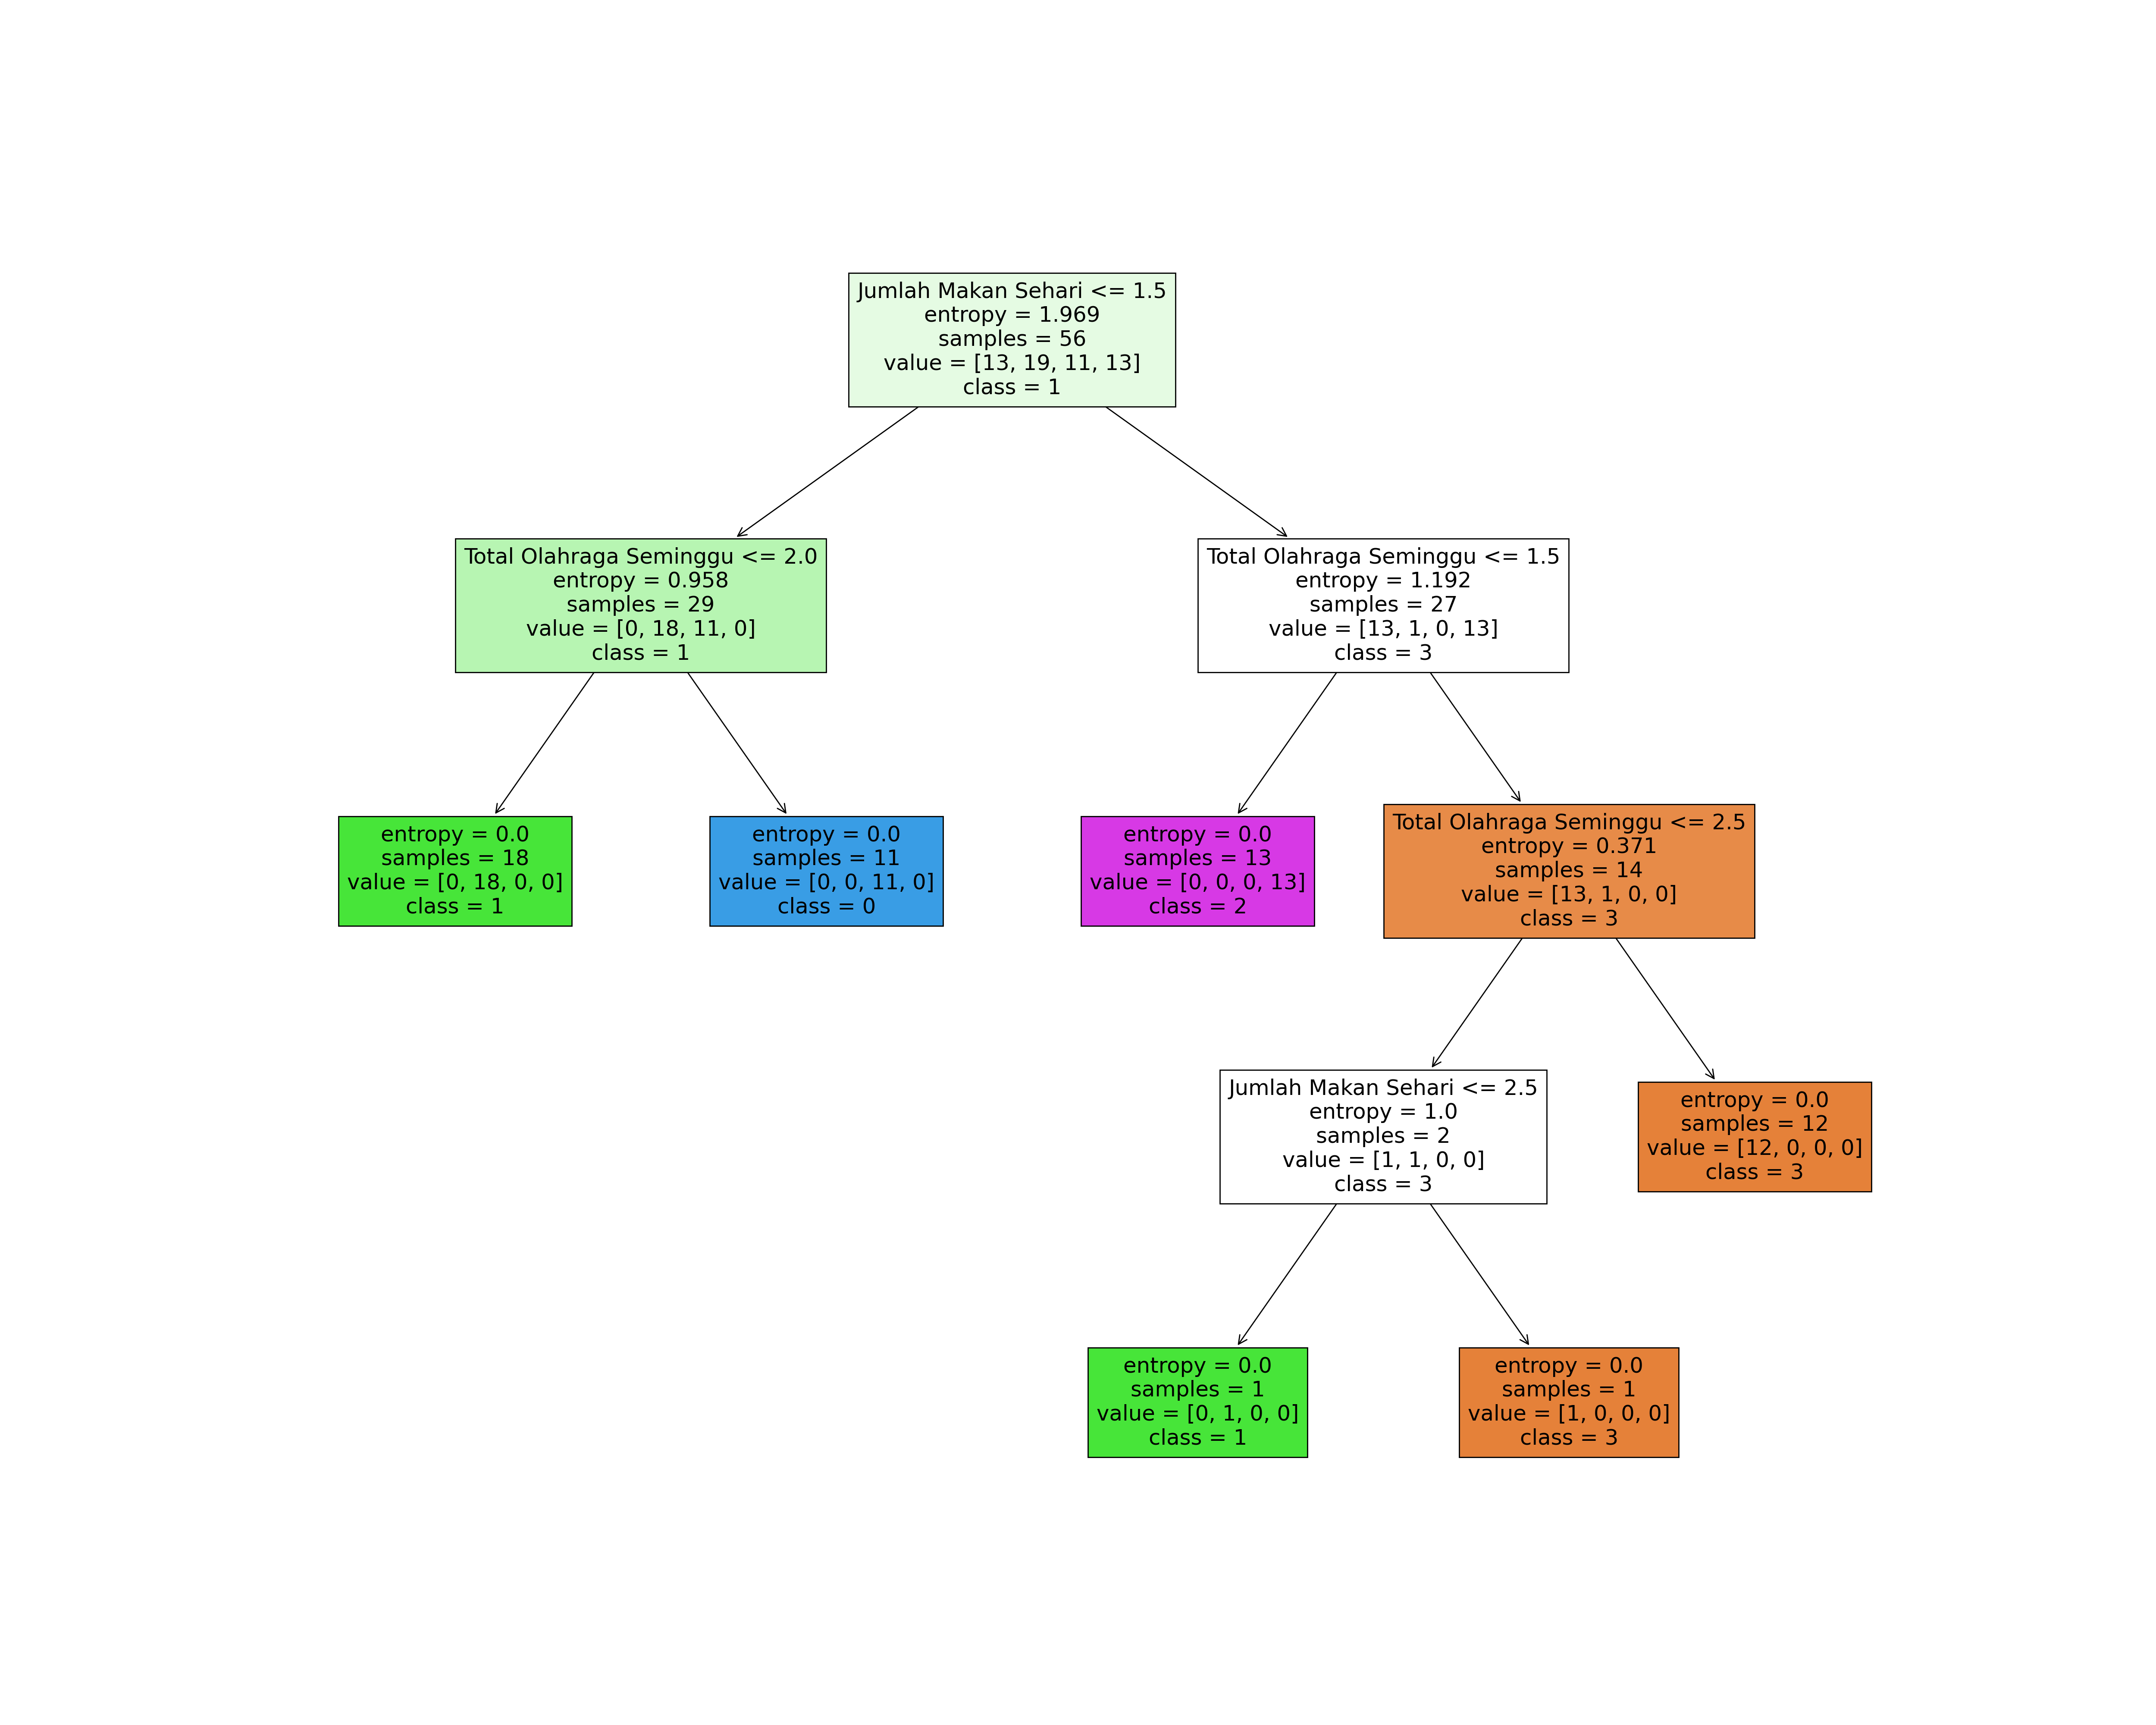

In [135]:
y_str = map(str, y.unique())

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=x.columns, class_names= list(y_str), filled=True)

## Random Forest

In [136]:
rf = RandomForestClassifier()

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rand_search = RandomizedSearchCV(rf, param_distributions=param_dist,n_iter=5,cv=5)

rand_search.fit(x_train, y_train)

best_rf = rand_search.best_estimator_

print('Best hyperparameters: ', rand_search.best_params_)

Best hyperparameters:  {'max_depth': 3, 'n_estimators': 395}


In [137]:
for i in range(3):
    print(best_rf.estimators_[i])

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1719017474)
DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1879085183)
DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1468527982)


In [138]:
rf = RandomForestClassifier(max_depth=best_rf.max_depth, n_estimators=best_rf.n_estimators)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

acc_score = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', acc_score)
print('F1 Score: ', f1_score)

Accuracy:  0.92
F1 Score:  0.905


In [139]:
# y_str = map(str, y.unique())
# for i in range(3):
#     b_tree = best_rf.estimators_[i]
#     dot_data = export_graphviz(b_tree,
#                                feature_names=x.columns, 
#                             #    class_names=list(y_str), 
#                                filled=True, 
#                                max_depth=best_rf.max_depth, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)
# plt.show()

In [140]:
import pickle
# Menyimpan model ke bentuk file
pickle.dump(rf , open('randomforest.pkl', 'wb'))
# with open('randomforest.pkl', 'wb') as model_file:
#     pickle.dump(rf, model_file)